<center><h1> Relaxation time analysis from MD simulations </h1> </center> </br>
<center>Version 2.0 , last modified: 17.2.2023</center>

<h3>1. README.yaml creation - basic info on simulations </h3>
In manage_files.py, last modified: 17.2.2023
<h3>2. Removal of water from xtc, tpr, gro for faster analysis </h3>
In manage_files.py, last modified: 17.2.2023 - add an extra option to create tpr file without water, new gromacs works strangly
<h3>3. Correlation function calculations</h3>
In relaxation_times.py, last modified: 15.6.2023 - fix bug in the calculation correlation functions without README.yaml
<h3>4. Average over correlation functions</h3>
In relaxation_times.py, last modified: 17.2.2023
<h3>5. Spin relaxation times calculations</h3>
In relaxation_times.py, last modified: 17.2.2023 
<h3>6. Plotting</h3>
In plotting.py, last modified: 7.2.2023

In [1]:
import sys
import numpy as np
from scipy import optimize
import relaxation_times as rt
import manage_files as mf
import plotting as pt
import matplotlib.pyplot as plt
import os
import re
import yaml
import fnmatch
#from numba import jit #

#gyromagnetic ratios for further developmant
# !!! NOTICE!!!
#values taken from matlab code and projecct work and slightly different than those in Wikipedia
#these values are also in the external file --> if change is needed; has to be changed there
#values here in jupyter just for the information and verify, why they are different
#!!! NOTICE END !!!
gammaD=41.695*10**6; #r*s^(-1)*T^(-1)
gammaH=267.513*10**6;
gammaC=67.262*10**6;
gammaN=-27.166*10**6;

/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/MDAnalysis/coordinates/chemfiles.py:59: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  MIN_CHEMFILES_VERSION = LooseVersion("0.9")


<h3> 1) Create README.yaml file + 2) Remove water </h3>
This part is intended for managing many simulations at the same time. <br>
Or just improving the management of simulations in general.<br>
The README.yaml allows for more efficient analysis later on. <br>
Simulations are expected to be in different subfolders of parent_folder_path.

In [3]:
#help(mf.go_through_simulation)

In [3]:
#help(mf.remove_water)

In [4]:
parent_folder_path="/media/ricky//Ricky2020/Corys_peptides/full_trajectories/"
systems=["DESA"] # select only systems which 
                                                     #folder name contains some of these
compress_xtc="Original" # True/False/Original 
                   #     True - creates tpr, xtc, gro with selection "selection"
                   #     False - creates tpr, gro with the selection, 
                   #             assumes that reduced xtc already exists
                   #     Original - uses original trajectories for correlation function calculation
                   #                slows significantly down the calculations
                    
selection="non-Water"  # at the moment only standard selections that exists in a default index file supported
                 # such as non-Water 
                    
for file in os.listdir(parent_folder_path):
    folder_path = parent_folder_path+os.fsdecode(file)+"/"
    for system in systems:
        if fnmatch.fnmatch(os.fsdecode(file), "*"+system+"*"):
            mf.go_through_simulation(folder_path)
            mf.remove_water(folder_path,selection,compress_xtc)


2_SDS_NA_TIP4P_solvated_DESAmber_production.xtc
2_SDS_NA_TIP4P_solvated_DESAmber_production.tpr
2_SDS_NA_TIP4P_solvated_DESAmber_production.gro


/home/ricky/anaconda3/envs/all3/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)


Checking for new trajectories within defiened conditions is succesfully finished
Exporting information with gmx dump


                       :-) GROMACS - gmx dump, 2021.1 (-:

                            GROMACS is written by:
     Andrey Alekseenko              Emile Apol              Rossen Apostolov     
         Paul Bauer           Herman J.C. Berendsen           Par Bjelkmar       
       Christian Blau           Viacheslav Bolnykh             Kevin Boyd        
     Aldert van Buuren           Rudi van Drunen             Anton Feenstra      
    Gilles Gouaillardet             Alan Gray               Gerrit Groenhof      
       Anca Hamuraru            Vincent Hindriksen          M. Eric Irrgang      
      Aleksei Iupinov           Christoph Junghans             Joe Jordan        
    Dimitrios Karkoulis            Peter Kasson                Jiri Kraus        
      Carsten Kutzner              Per Larsson              Justin A. Lemkul     
       Viveca Lindahl            Magnus Lundborg             Erik Marklund       
        Pascal Merz             Pieter Meulenhoff            Teemu Mur

great success!!!


<h3> 3) Calculate correlation functions </h3>
Code exists and will be soon implemented <br> 
Includes creation of ndx file and calling gromacs for corellation function analysis

<h4>Example use 1 of rt.CalculateCorrelationFunctions</h4>
<br>
No README.yaml exists, user enters gro,xtc,tpr files path <br>
If 42 is returned, be happy, you just obtained <br>
The ultimate answer to life, universe, and everything

In [9]:
#help(rt.CalculateCorrelationFunctions)

In [7]:
output_path="../../CorysPeptides/correlation_functions/try/"    
folder_path="/media/ricky//Ricky2020/Corys_peptides/full_trajectories/eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1/"


begin=0
end=100000
RM_avail=False
atom1="N"
atom2="HN"
moleculeType="Protein"
gro="non-Water_eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1.gro"
xtc="non-Water_eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1.xtc"
tpr="non-Water_eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1.tpr"


rt.CalculateCorrelationFunctions(folder_path,begin,end,RM_avail,atom1,atom2,moleculeType,output_path,gro,xtc,tpr)

Number of corelation functions to calculate: 21 

Calculatin correlation function 1, Selected 0: '2TRP'
 last frame 42
Calculatin correlation function 2, Selected 1: '3GLN'
 last frame 42
Calculatin correlation function 3, Selected 2: '4GLY'
 last frame 42
Calculatin correlation function 4, Selected 3: '5ILE'
 last frame 42
Calculatin correlation function 5, Selected 4: '6GLY'
 last frame 42
Calculatin correlation function 6, Selected 5: '7VAL'
 last frame 42
Calculatin correlation function 7, Selected 6: '8GLY'
 last frame 42
Calculatin correlation function 8, Selected 7: '9ALA'
 last frame 42
Calculatin correlation function 9, Selected 8: '10ALA'
 last frame 42
Calculatin correlation function 10, Selected 9: '11VAL'
 last frame 42
Calculatin correlation function 11, Selected 10: '12GLY'
 last frame 42
Calculatin correlation function 12, Selected 11: '13LEU'
 last frame 42
Calculatin correlation function 13, Selected 12: '14VAL'
 last frame 42
Calculatin correlation function 14, Selec

<h4>Example use 2 of rt.CalculateCorrelationFunctions</h4>
<br>
README.yaml exists, use for peptides/proteins <br>


Calculates correlation functions for all the bonds of the same typy within the system. <br>
In the case of multiple same proteins, correlation functions are calculated separately <br>
as thouht for different residues

In [18]:
output_path="../../CorysPeptides/correlation_functions/peptides/raw/"   
parent_folder_path="/media/ricky//Ricky2020/Corys_peptides/full_trajectories/"
systems=[""] # select only systems which 
                                                     #folder name contains some of these

begin=-1
end=-1
RM_avail=True
atom1="N"
atom2="HN"
moleculeType="Protein"

for file in os.listdir(parent_folder_path):
    folder_path = parent_folder_path+os.fsdecode(file)+"/"
    for system in systems:
        if (fnmatch.fnmatch(os.fsdecode(file), "*"+system+"*")
            and not fnmatch.fnmatch(os.fsdecode(file), "*empty*")
            and not fnmatch.fnmatch(os.fsdecode(file), "*ordered*")):
            print(os.fsdecode(file))
            rt.CalculateCorrelationFunctions(folder_path,begin,end,RM_avail,atom1,atom2,moleculeType,output_path)
    

eElaB_dimer_50SDS_310K_CHARMM_Na_Neut_OPC_Water_Model
Correlation function for  eElaB_dimer_50SDS_310K_CHARMM_Na_Neut_OPC_Water_Model  already calculated.
eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1
Correlation function for  eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1  already calculated.
eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2
Correlation function for  eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2  already calculated.
eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica3
Correlation function for  eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica3  already calculated.
eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2
Correlation function for  eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica2  already calculated.
eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3
Correlation function for  eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica3  already calculated.
eYqjD_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_replica1
Correlation function for  e

In [16]:
def CorrelationFunctionsLipids(parent_folder_path,begin,end,RM_avail,moleculeType,output_path,systems,CH_bonds):
    """
    Get Correlation Functions for different bonds in lipids/other molecules.
    
    This function is calling CalculateCorrelationFunctions(...) function
    and later on reorganizes data.
    
    
    (folder_path,begin,end,RM_avail,moleculeType,output_path) 
    are inputs for CalculateCorrelationFunctions
        
        parent_folder_path - subfolders with xtc, tpr, README.yaml ...
        begin -              corresponds to -b in gmx
                             if -1, value of EQUILIBRATED from README.yeml is used
        end -                corresponds to -e in gmx
                             if -1, the whole trajectory is used
        RM_avail -           must be True
        moleculeType-        at the moment works only for 'All'
        output_path -        place to create a folder with results
        
    further inputs:
        systems    -         to specify if only subset of systems 
                             in parent_folder_path to be used
        CH_bonds   -         bonds in the system to calculate CF for
                             fails if different parts in the system
                             have the same name (let's say C1, H11 bond
                             exists in a lipid molecule as well as in
                             protein)
                             if you run into this problem, create a simulation
                             with only protein/lipids
                             this should be improved here in the future
        
    """
    
    #going throught different folders
    for file in os.listdir(parent_folder_path):
        folder_path = parent_folder_path+os.fsdecode(file)+"/"
        for system in systems:
            if fnmatch.fnmatch(os.fsdecode(file), "*"+system+"*") :
                print(os.fsdecode(file))

                
                readmeS = folder_path+ "/README.yaml"
                with open(readmeS) as yaml_file:
                    readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
                
                run_again=True
                main_name=readme["FILES"]["tpr"]["NAME"][:-4]
                
                if os.path.isfile(output_path+main_name+"/README_correl.yaml"):
                    
                    if end==-1:
                        e=int(readme["FILES_FOR_RELAXATION"]["xtc"]["LENGTH"])
                    else:
                        e=end
                    if begin==-1:
                        b=int(readme["EQILIBRATED"])
                    else:
                        b=begin
                        
                    with open(output_path+main_name+"/README_correl.yaml") as yaml_file:
                        readme_new = yaml.load(yaml_file, Loader=yaml.FullLoader)
                    
                 
                    
                    if (readme_new["xtc"]==readme["FILES_FOR_RELAXATION"]["xtc"]["NAME"]
                        and readme_new["FROM_XTC"]==readme["FILES_FOR_RELAXATION"]["xtc"]["MODIFIED"]
                        and readme_new["tpr"]==readme["FILES_FOR_RELAXATION"]["tpr"]["NAME"]
                        and readme_new["BEGGIN"]==b and readme_new["END"]==e and readme_new["PROBLEMS"]==None):
                        run_again=False

                #run_again=True
                print(run_again)
                if run_again:
                    for atom1, atom2 in CH_bonds:
                        rt.CalculateCorrelationFunctions(folder_path,begin,end,RM_avail,atom1,atom2,moleculeType,output_path)


                    

                    try:
                        os.system("mkdir "+output_path+main_name)
                    except:
                        pass


                    new_readme={}
                    new_readme["PROBLEMS"]={}
                    new_readme["BONDS"]={}
                    all_OK=True
                    for i,file2 in enumerate(os.listdir(output_path)):
                        
                        correl_path=output_path+os.fsdecode(file2)+"/"
                        if main_name in os.fsdecode(file2) and main_name!=os.fsdecode(file2):
                            
                            for k,bond in enumerate(CH_bonds):
                                bond_name=bond[0]+"_"+bond[1]
                                if bond_name in os.fsdecode(file2):
                                    os.system("mv "+correl_path+"/NHrotaCF_0.xvg "+output_path+main_name+"/NHrotaCF_"+str(k)+".xvg")

                                    with open(correl_path+"/README_correl.yaml") as yaml_file:
                                        old_readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
                                    
                                    new_readme["name"]=old_readme["name"]
                                    new_readme["xtc"]=old_readme["xtc"]
                                    new_readme["path"]=old_readme["path"]
                                    new_readme["FROM_XTC"]=old_readme["FROM_XTC"]
                                    new_readme["tpr"]=old_readme["tpr"]
                                    new_readme["BEGGIN"]=old_readme["BEGGIN"]
                                    new_readme["END"]=old_readme["END"]
                                    new_readme["ANALYZED"]=old_readme["ANALYZED"]
                                    if "Problem" in str(old_readme["LENGTH"]):
                                        new_readme["PROBLEMS"][bond_name]=old_readme["LENGTH"]
                                    else:
                                        new_readme["BONDS"][k]=str(bond[0])+"_"+str(bond[1])

                                    os.system("rm -r "+correl_path)
          
                    if len(new_readme["PROBLEMS"])==0:
                        
                        new_readme["PROBLEMS"]=None
                        #print(readme)
                        for key in readme["ANALYSIS"]["CORRELATION_FUNCTIONS"]:
                            if key=="All":
                                for key2 in readme["ANALYSIS"]["CORRELATION_FUNCTIONS"][key]:
                                    print(key2)
                                path_to_readme=readme["ANALYSIS"]["CORRELATION_FUNCTIONS"][key]["help"]["analysis0"]["PATH"]
                                #path_to_readme=readme["ANALYSIS"]["CORRELATION_FUNCTIONS"]["All"]
                                del(readme["ANALYSIS"]["CORRELATION_FUNCTIONS"][key]["help"])
                                alanysis=len(readme["ANALYSIS"]["CORRELATION_FUNCTIONS"])
                                readme["ANALYSIS"]["CORRELATION_FUNCTIONS"]["All"]["analysis"+str(alanysis)]={}
                                readme["ANALYSIS"]["CORRELATION_FUNCTIONS"]["All"]["analysis"+str(alanysis)]["PATH"]=path_to_readme
                                readme["ANALYSIS"]["CORRELATION_FUNCTIONS"]["All"]["analysis"+str(alanysis)]["LENGTH"]=old_readme["LENGTH"]
                                readme["ANALYSIS"]["CORRELATION_FUNCTIONS"]["All"]["analysis"+str(alanysis)]["ANALYZED"]=old_readme["ANALYZED"]
                                readme["ANALYSIS"]["CORRELATION_FUNCTIONS"]["All"]["analysis"+str(alanysis)]["FROM_XTC"]=old_readme["FROM_XTC"]
                                readme["ANALYSIS"]["CORRELATION_FUNCTIONS"]["All"]["analysis"+str(alanysis)]["BEGGIN"]=old_readme["BEGGIN"]
                                readme["ANALYSIS"]["CORRELATION_FUNCTIONS"]["All"]["analysis"+str(alanysis)]["END"]=old_readme["END"]


                    with open(output_path+main_name+"/README_correl.yaml", 'w') as f:
                        yaml.dump(new_readme,f, sort_keys=True)

                    with open(readmeS, 'w') as f:
                        yaml.dump(readme,f, sort_keys=False)



<h4>Example use 3 of rt.CalculateCorrelationFunctions by rt.CorrelationFunctionsLipids</h4>
<br>
README.yaml exists, use for lipids/detergents <br>


Calculates correlation functions for all the bonds specified. <br>
If more bonds of the same type exist, it averages over them <br>
Also means that if the same atom names exist for different 
molecules/parts - it creates a problem

In [5]:
#help(rt.CorrelationFunctionsLipids)

In [17]:


output_path="../../CorysPeptides/correlation_functions/SDS/average_over_SDS/"  
output_path="../../CorysPeptides/correlation_functions/"  
parent_folder_path="/media/ricky//Ricky2020/Corys_peptides/full_trajectories/"

parent_folder_path="/media/ricky//Ricky2020/Corys_peptides/ricky_new/"
systems=["test"] # select only systems which



begin=-1
end=-1
RM_avail=True
moleculeType="All"

CH_bonds=[("C1","H11"),("C2","H21"),("C3","H31"),
("C4","H41"),("C5","H51"),("C6","H61"),
("C7","H71"),("C8","H81"),("C9","H91"),
("C10","H101"),("C11","H111"),("C12","H121")]


CH_bonds=[("C1","H11"),("C2","H21"),("C3","H31")]

CH_bonds_Amber=[("C1","H1"),("C2","H24"),("C3","H22"),
("C4","H20"),("C5","H18"),("C6","H16"),
("C7","H14"),("C8","H12"),("C9","H10"),
("C10","H8"),("C11","H6"),("C12","H4")]


CorrelationFunctionsLipids(parent_folder_path,begin,end,RM_avail,moleculeType,output_path,systems,CH_bonds)

test
False


In [23]:


output_path="../../CorysPeptides/correlation_functions/SDS/average_over_SDS/"   
parent_folder_path="/media/ricky//Ricky2020/Corys_peptides/full_trajectories/"
systems=["replica1"] # select only systems which



begin=-1
end=-1
RM_avail=True
moleculeType="All"

CH_bonds=[("C1","H11"),("C2","H21"),("C3","H31"),
("C4","H41"),("C5","H51"),("C6","H61"),
("C7","H71"),("C8","H81"),("C9","H91"),
("C10","H101"),("C11","H111"),("C12","H121")]


CorrelationFunctionsLipids(parent_folder_path,begin,end,RM_avail,moleculeType,output_path,systems,CH_bonds)

Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 4019390
Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 4019390
Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 4019390
Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 4019390
Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 4019390
Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 4019390
Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 4019390
Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 4019390
Number of corelation functions to calculate: 1 

Calculatin correlation function 1,  last frame 4019390
Number of corelation functions to calculate: 1 

Calculatin corr

mkdir: cannot create directory ‘../../CorysPeptides/correlation_functions/SDS/average_over_SDS/eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1’: File exists


{'FILES': {'xtc': {'NAME': 'non-Water_eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1.xtc', 'SIZE': 3206.901844, 'MODIFIED': '2023-02-17 11:21:49'}, 'edr': {'NAME': 'none', 'SIZE': 'none', 'MODIFIED': 'none'}, 'tpr': {'NAME': 'eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1.tpr', 'SIZE': 0.872988, 'MODIFIED': '2023-02-17 14:11:11', 'GMX_VERSION': '\\x00\\x'}, 'top': {'NAME': 'eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1.top', 'SIZE': 0.000466, 'MODIFIED': '2023-02-17 10:16:29'}, 'mdp': {'NAME': 'none', 'SIZE': 'none', 'MODIFIED': 'none'}, 'ndx': {'NAME': 'eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1.ndx', 'SIZE': 0.000433, 'MODIFIED': '2023-02-17 12:53:45'}, 'gro': {'NAME': 'eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica1.gro', 'SIZE': 0.092368, 'MODIFIED': '2023-02-17 14:11:11'}, 'cpt': {'NAME': 'none', 'SIZE': 'none', 'MODIFIED': 'none'}, 'log': {'NAME': 'none', 'SIZE': 'none', 'MODIFIED': 'none'}}, 'EQILIBRATED': '0', 'TEMPERATURE': 310.0, 'COMPOSITION

KeyError: 'analysis0'

<h3> 4) Average over Correlation functions </h3>

Code exists, I will add it soon

<h3> 5) Get spin relaxation data and time scales of dynamics </h3>

Spin relaxation calculation parts adapted from scripts 
by  H. Antila,  S. Ollila and T. Ferreira <br>
saved in relaxation_times.py

<h4> 3.1) Set analysis parameters</h4>

In [16]:
"""Parameters to be specified by the user"""
OP=0 # order parameter
smallest_corr_time=-2 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=150 # number of exponential functions to be fitted between the samlles and biggest corr time
analyze=1/10 # the proportin of correlation data to be used for fitting, ex. 1/2 uses first half of the data
magnetic_field=8.49 #2.35 # 5.99 # 8.49 T (values used in SDS paper, J.Chem. Soc.,, Faraday Trans. 1, 1988, 84(12), 4475-4486)
#magn_field_MHz=850 # for values in MHz
#magnetic_field=magn_field_MHz*2*np.pi/gammaH*10**6
nuclei="2H" #nuclei to calculate: 2H-deutherium; 13C - carbon; 15N - nitrogen 

<h4>3.2) Set paths and names</h4>

In [17]:
parent_folder_path="../../CorysPeptides/correlation_functions/SDS/average_over_SDS/"   # for option 3 of calculation (not needed for option 2)
systems=["empty_60SDS_micelle_CHARMM36_OPC_10psSF_replica"]               # for opt 3, to further narrow down selection
                           # only takes the subfolders that contain the strings in the list
    
folder_path="../../CorysPeptides/correlation_functions/SDS/average_over_SDS/empty_60SDS_100fsSF_replica1/" # for opt 2, not needed for otp 3

output_name="empty_60SDS_100fsSF_replica1" # serves as a prefix for yaml output files
                           # if None and README_correl.yaml exists, xtc file name is used
                           #delete the '=None' in the last argument of rt.analyze_all_in_folder(...,output_name=None)
                           # if you wish for the name here to be used
                           # otherwise uses the name of the xtc file, if README_correl.yaml exists
                           # README_correl.yaml exists if correlation functions were 
                           # calculated by this script
                           # if README_correl.yaml does not exist, output_name must be specified
                           

author_name="Ricky Nencini" # may be one day actually saved to somewhere :D
                            # for now be happy that you see your (or mine :D :D)
                            # beautiful name here :P

output_path_relax="../../CorysPeptides/relax_times_yamls/SDS/average_over_SDS/"            # folder to save spin relaxation times yaml files
output_path_timescales="../../CorysPeptides/timescales_yamls/SDS/average_over_SDS/"  # folder to save timescale yaml files 

<h4>3.3) Perform the calculations </h4>
<h4>Option 1 - only calculates from 1 *.xvg file, for testing..., no output saved</h4>

In [17]:
"""Analyze individual correlation function - in case of testing..."""
#input_corr_file="alphaCF.xvg"
#AA=rt.GetRelaxationData(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,input_corr_file,nuclei,output_name)

'Analyze individual correlation function - in case of testing...'

<h4>Option 2 - calculates for 1 system in folder_path, saves spin relaxation times and timescales into yaml files</h4>

In [10]:
"""Analyze one system - the whole content of a folder"""
 
aminoAcids=rt.analyze_all_in_folder(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,folder_path,nuclei,output_path_relax,output_path_timescales,output_name)

'Analyze one system - the whole content of a folder'

<h4>Option 3 - analyze different systems in a given parent_folder_path</h4>

empty_60SDS_Na_DESAmber_TIP4P_307K_replica1


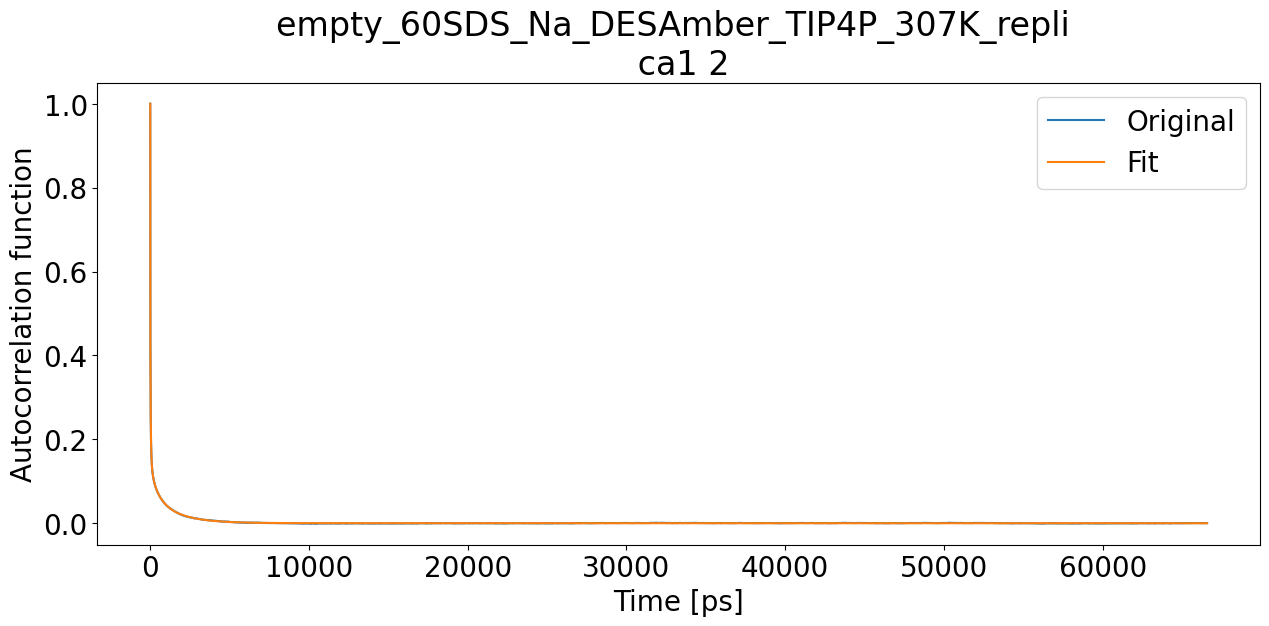

T1: 0.02540826260392553 T2: 0.018937782945148716 NOE: 0


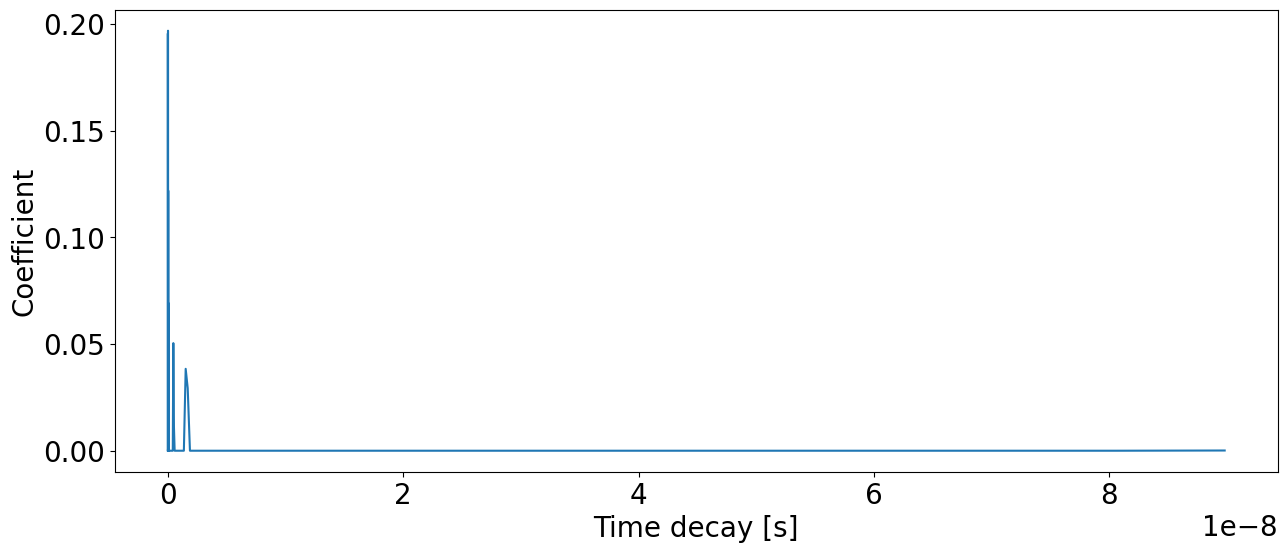

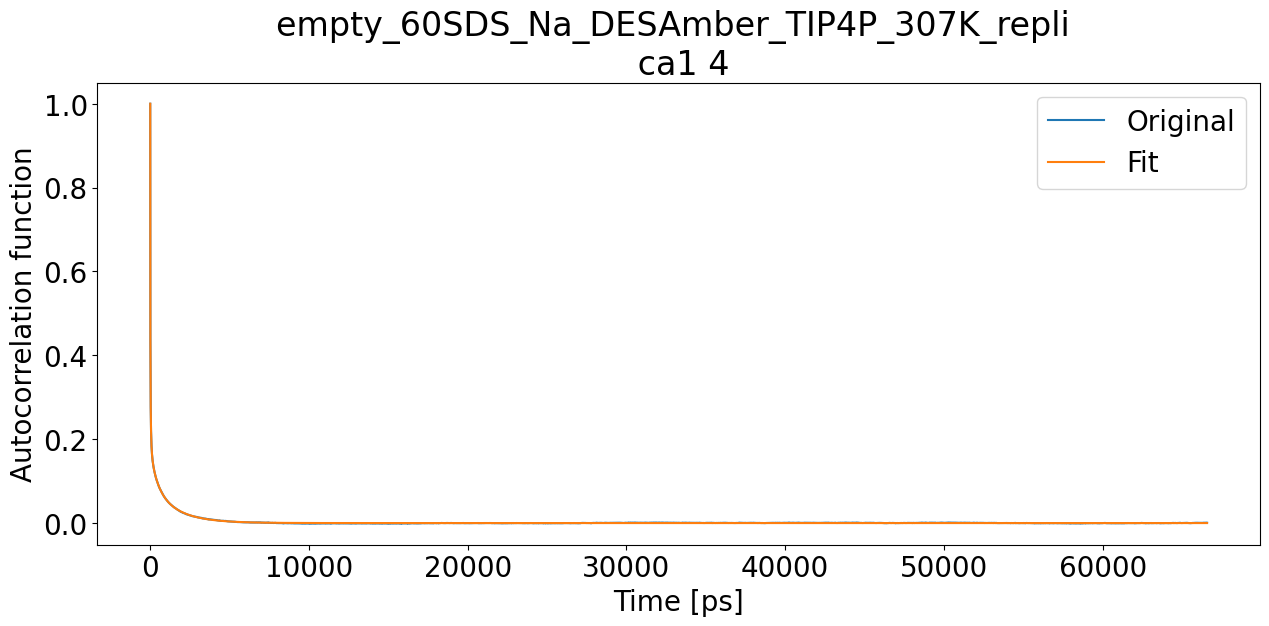

T1: 0.020502384976958072 T2: 0.015343424657354826 NOE: 0


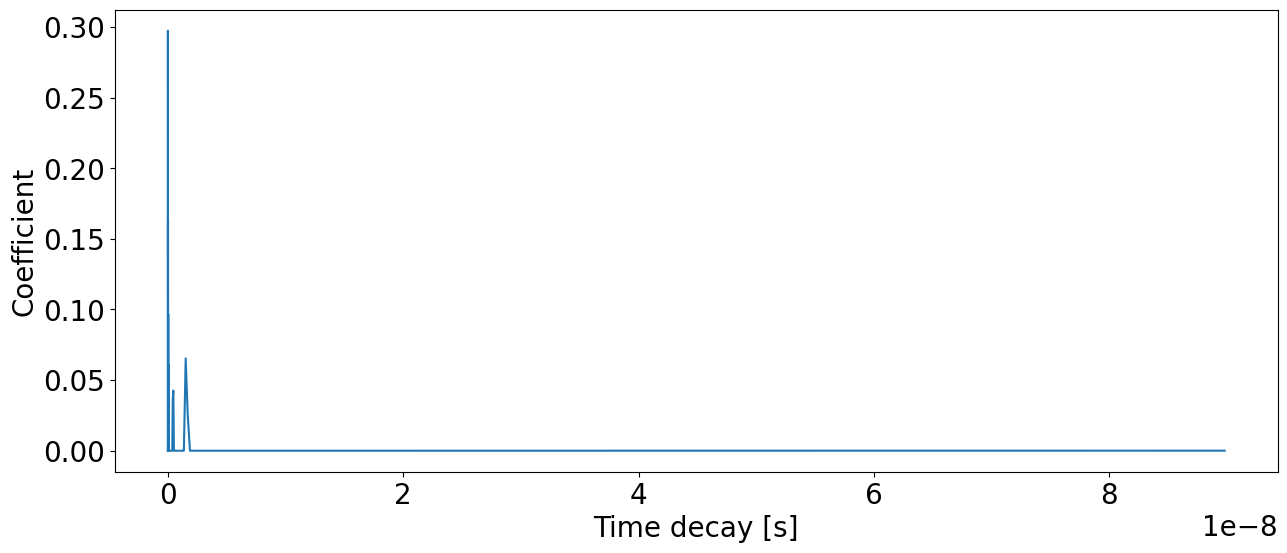

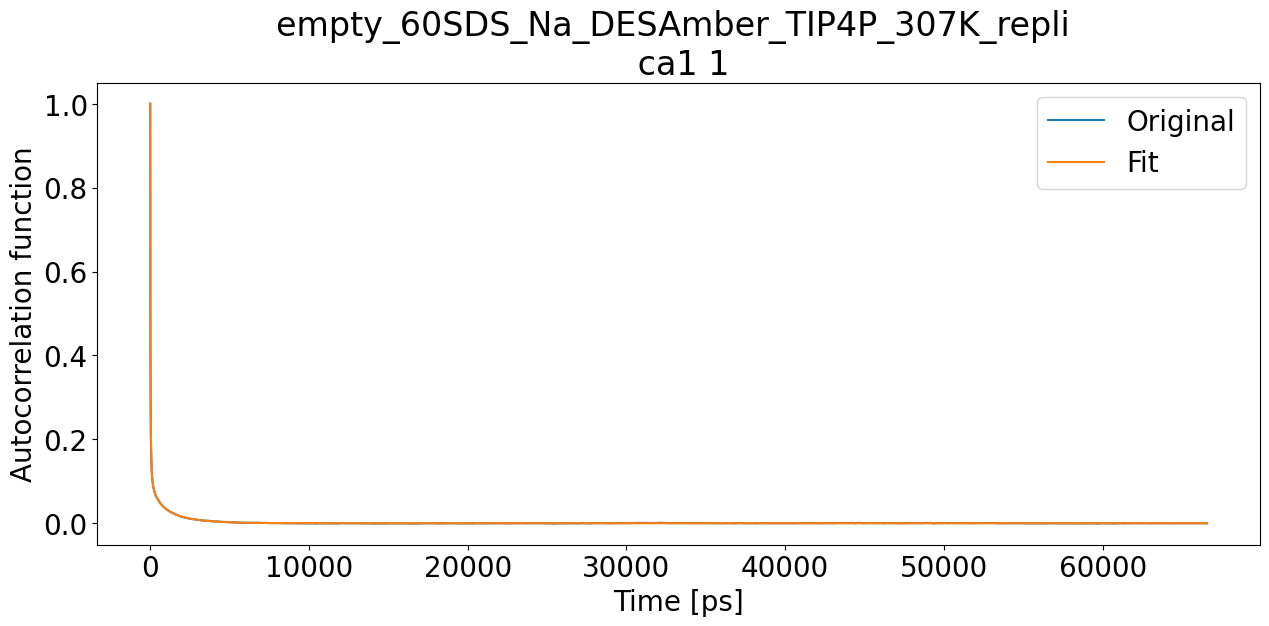

T1: 0.030549175318099822 T2: 0.023364070992539152 NOE: 0


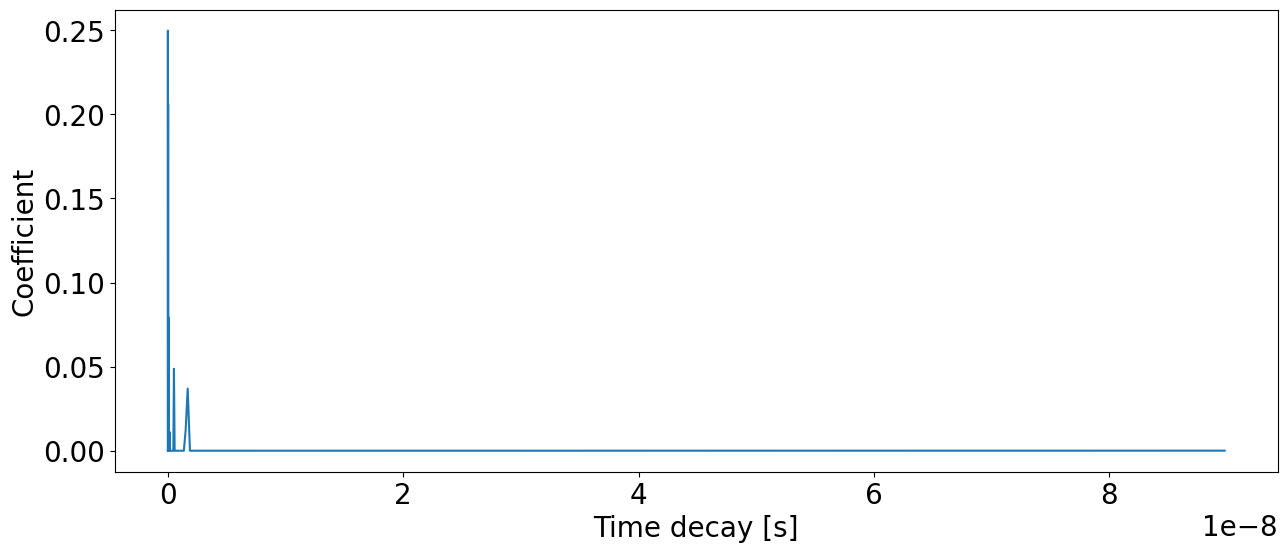

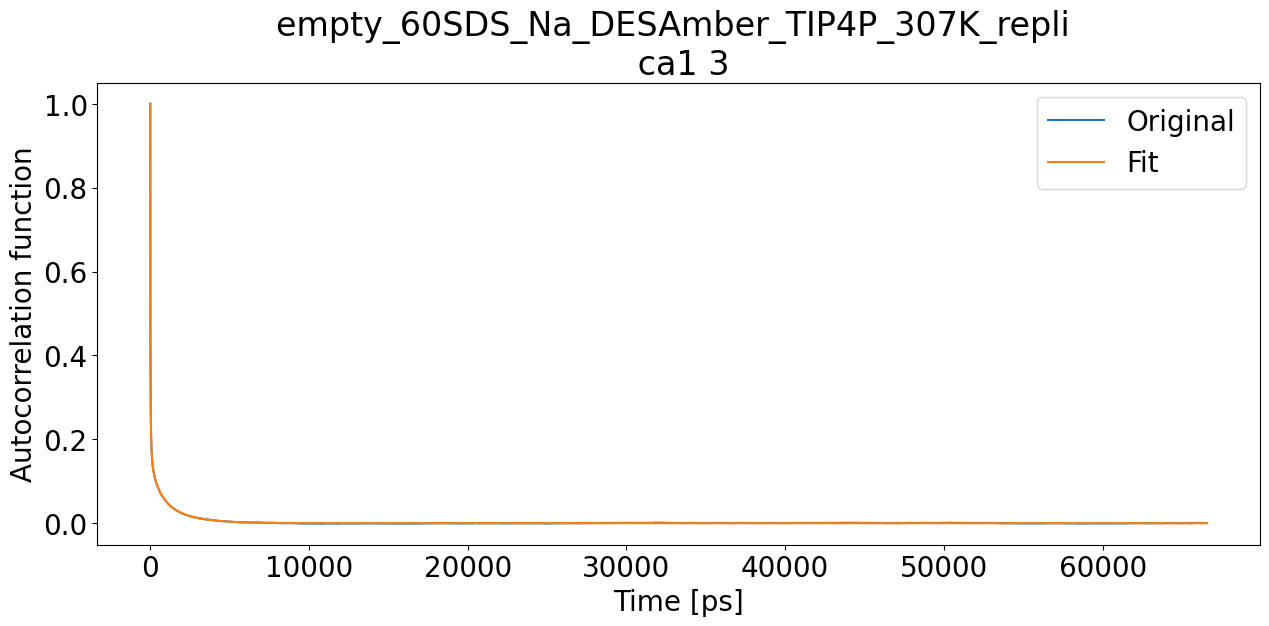

T1: 0.022046139882104004 T2: 0.016359735160084703 NOE: 0


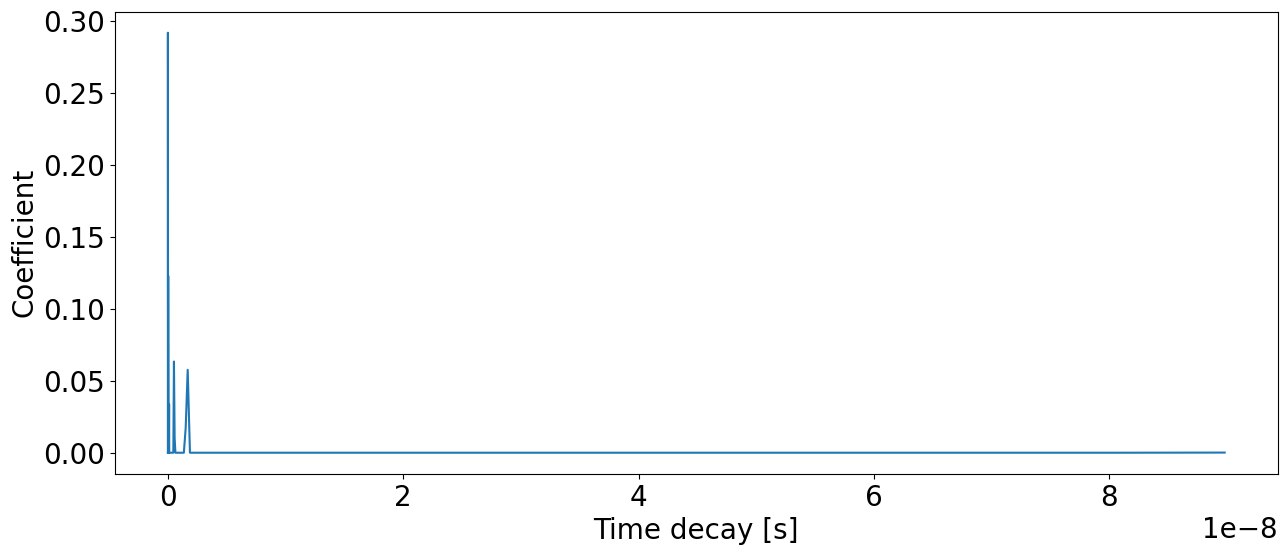

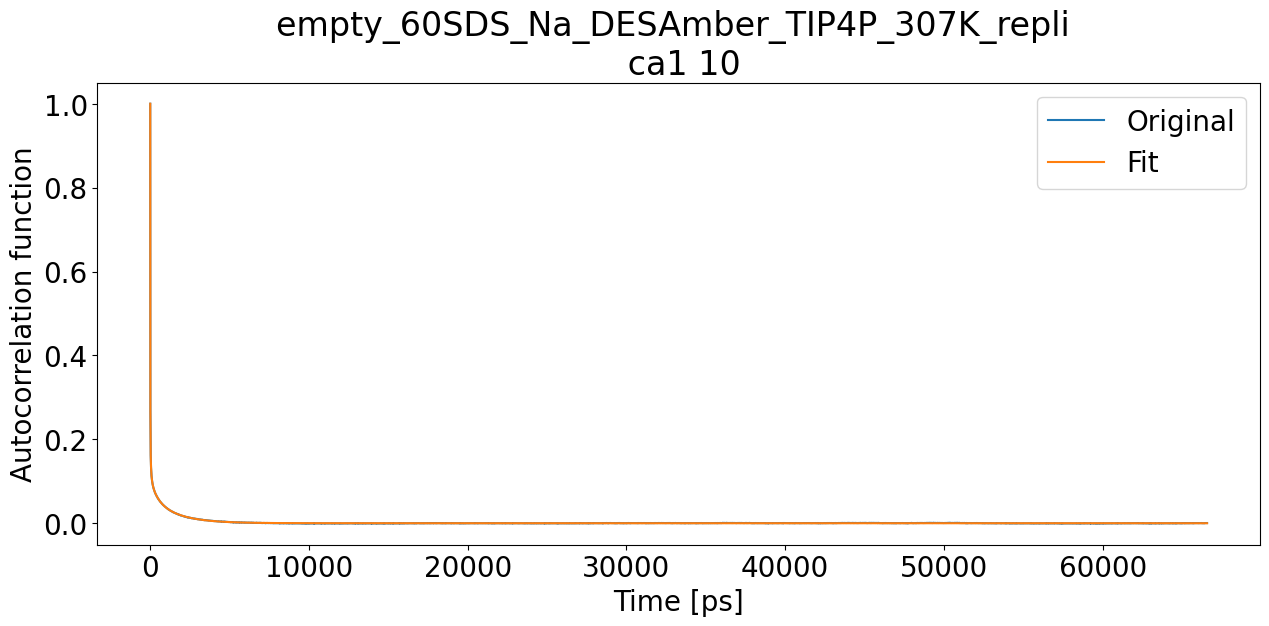

T1: 0.032651885030583375 T2: 0.023931212809369776 NOE: 0


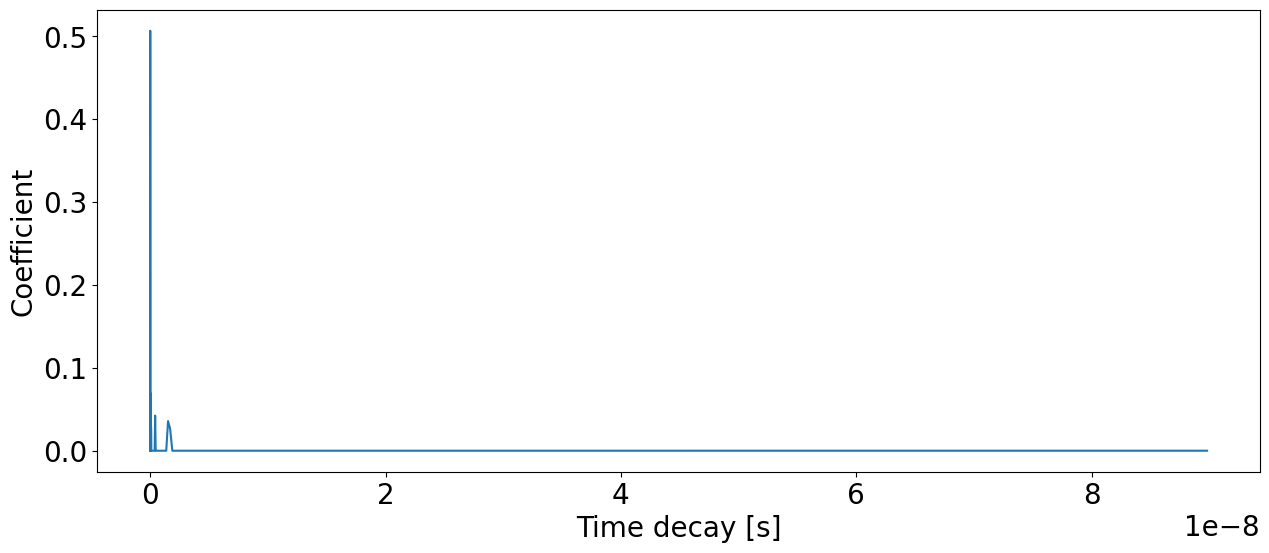

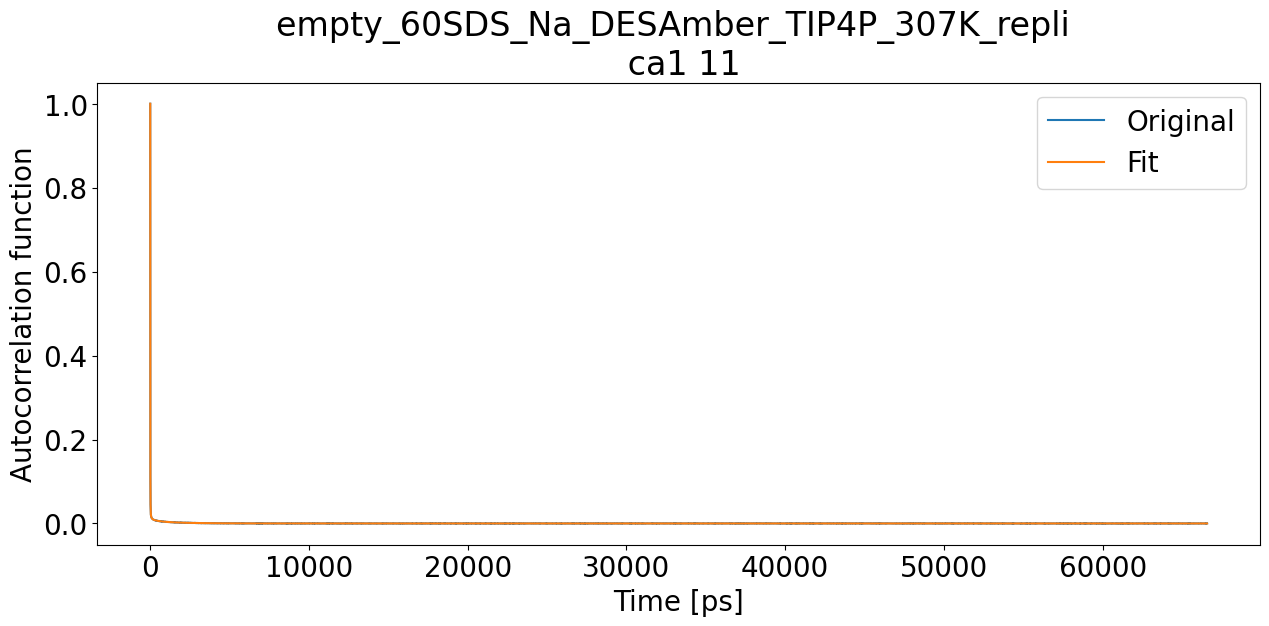

T1: 0.20742831526237768 T2: 0.15966050125658396 NOE: 0


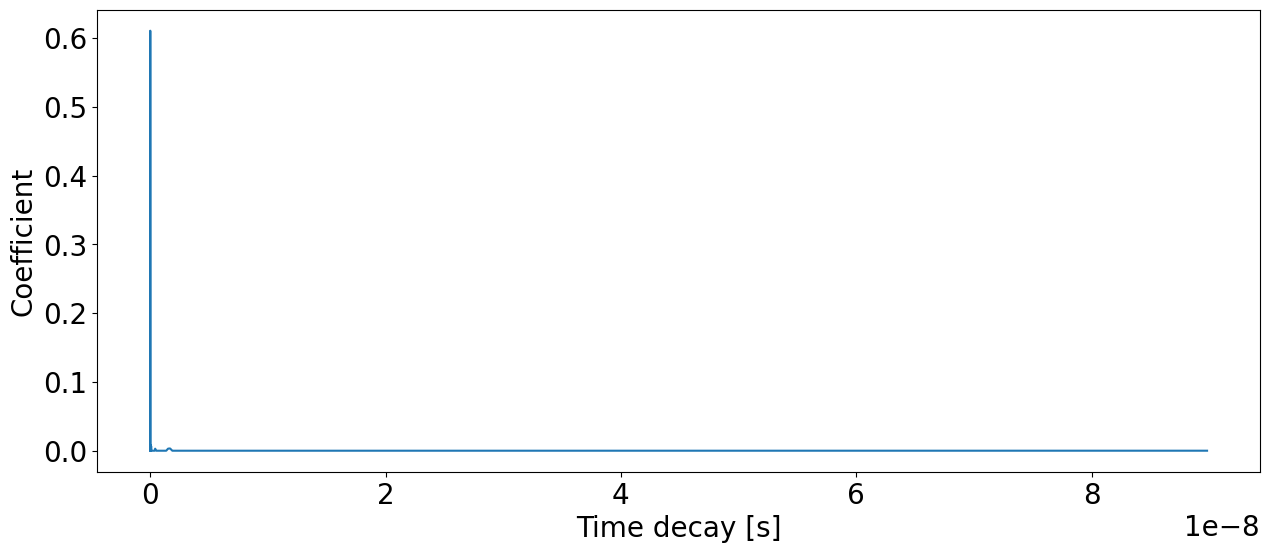

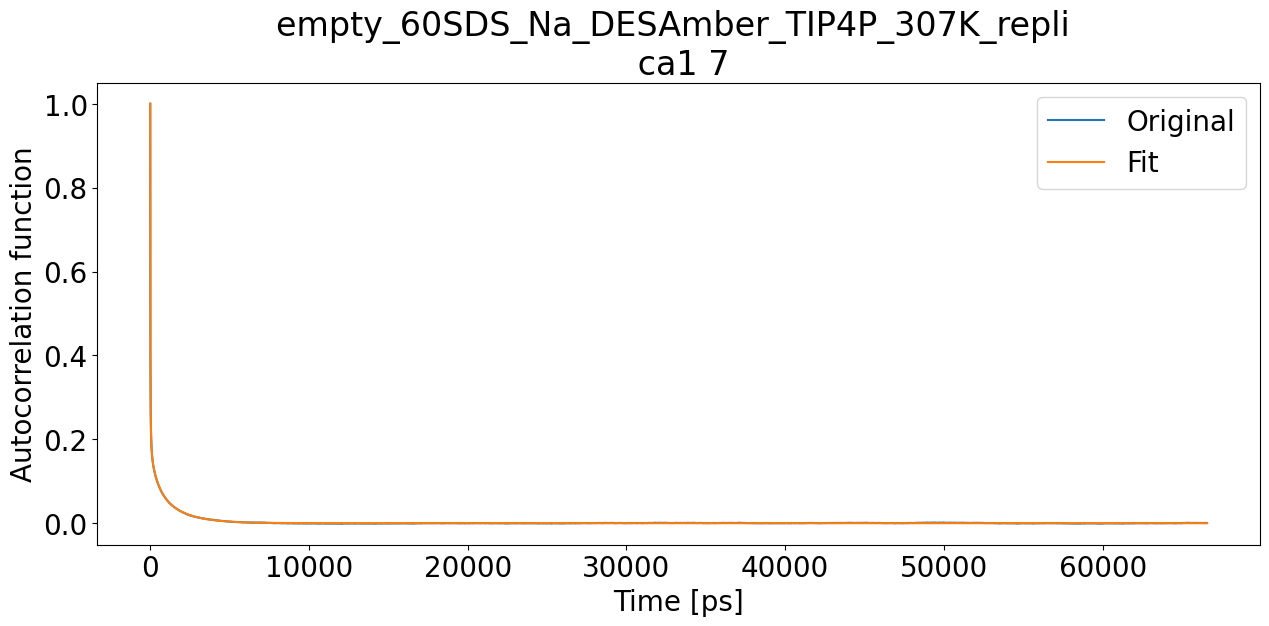

T1: 0.020508717334561406 T2: 0.015150156653611812 NOE: 0


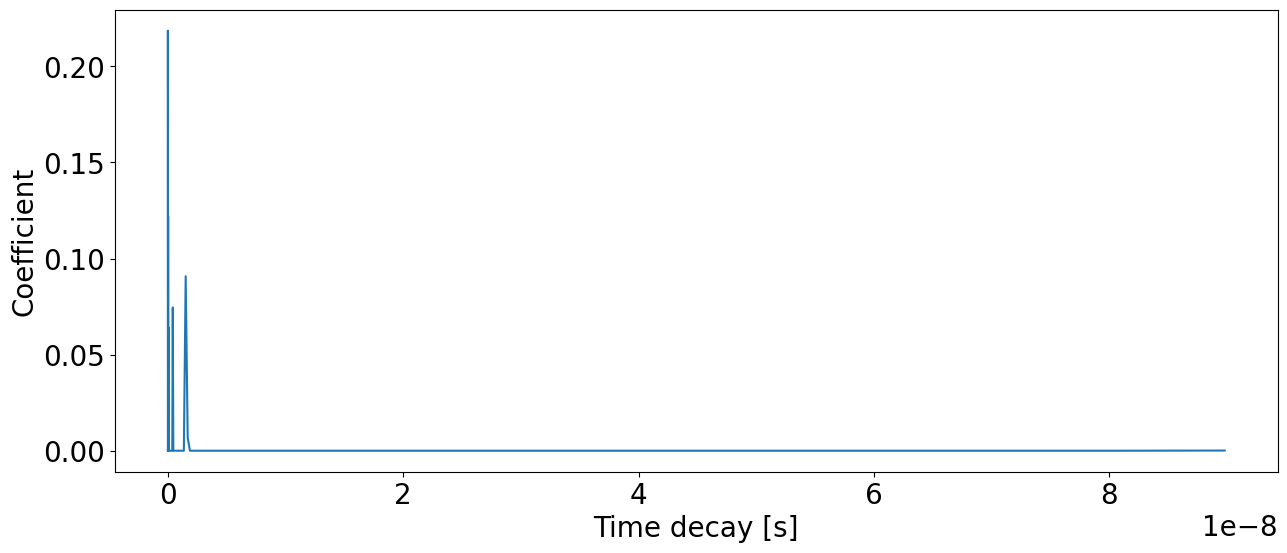

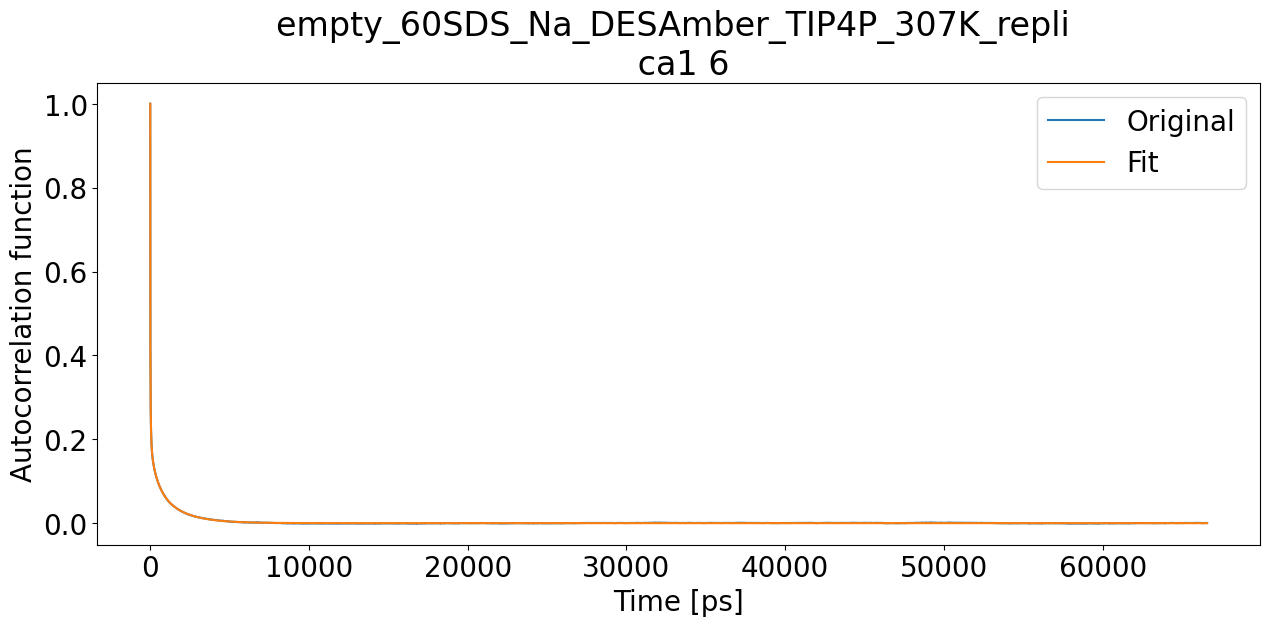

T1: 0.019777597491581873 T2: 0.01470266928463686 NOE: 0


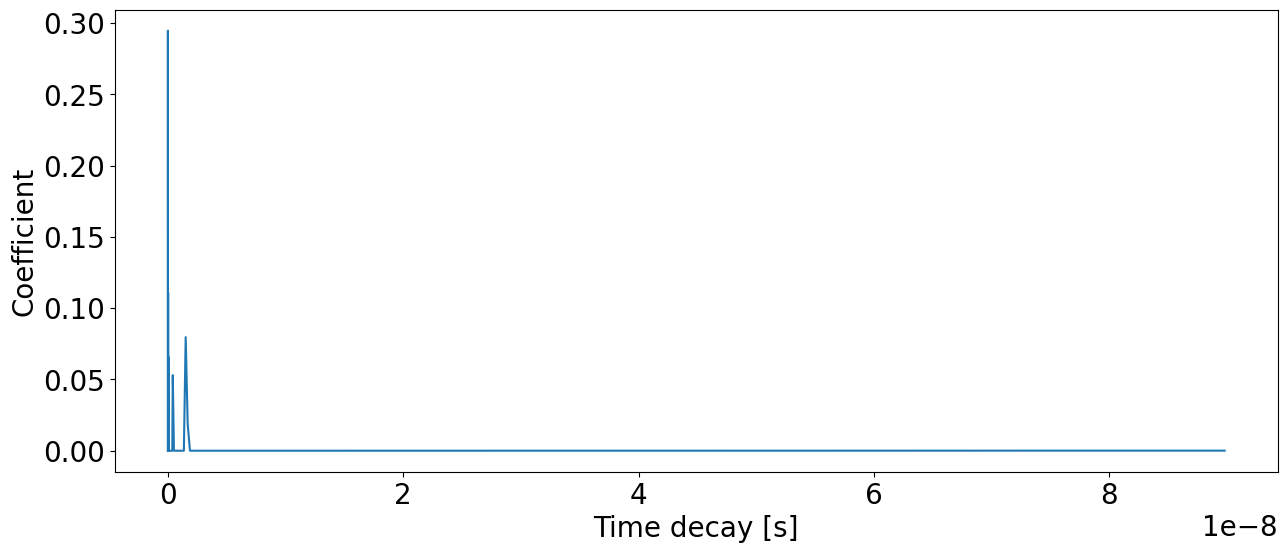

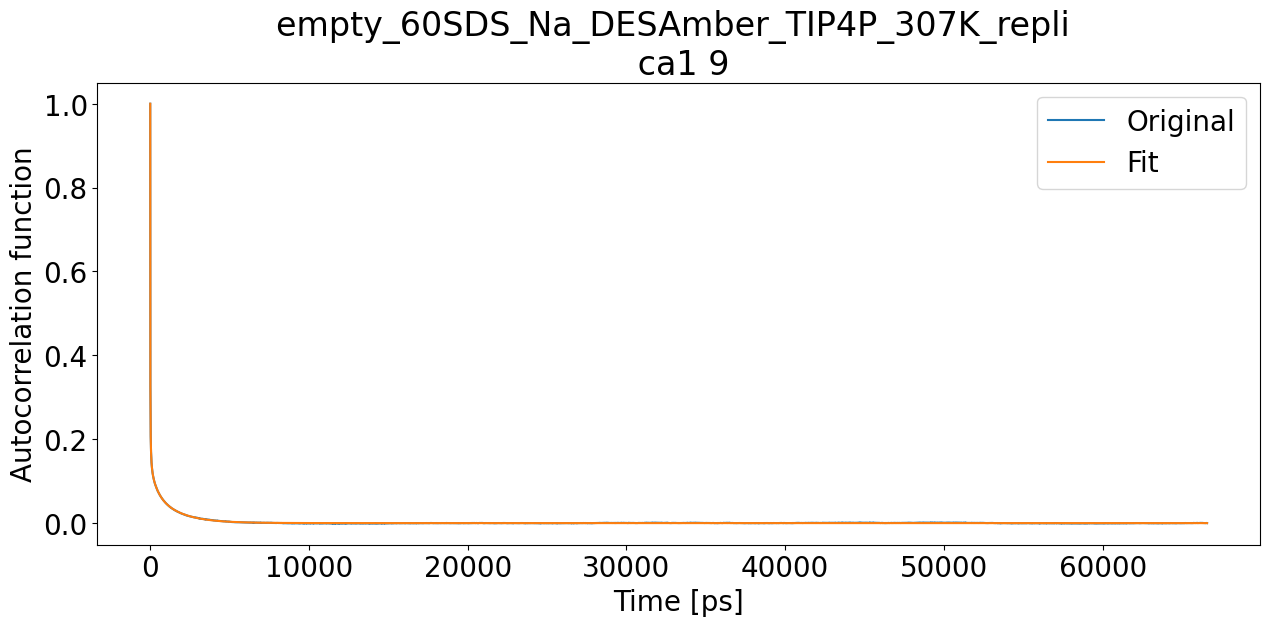

T1: 0.025515542747249122 T2: 0.01880023200750282 NOE: 0
correl function should exist


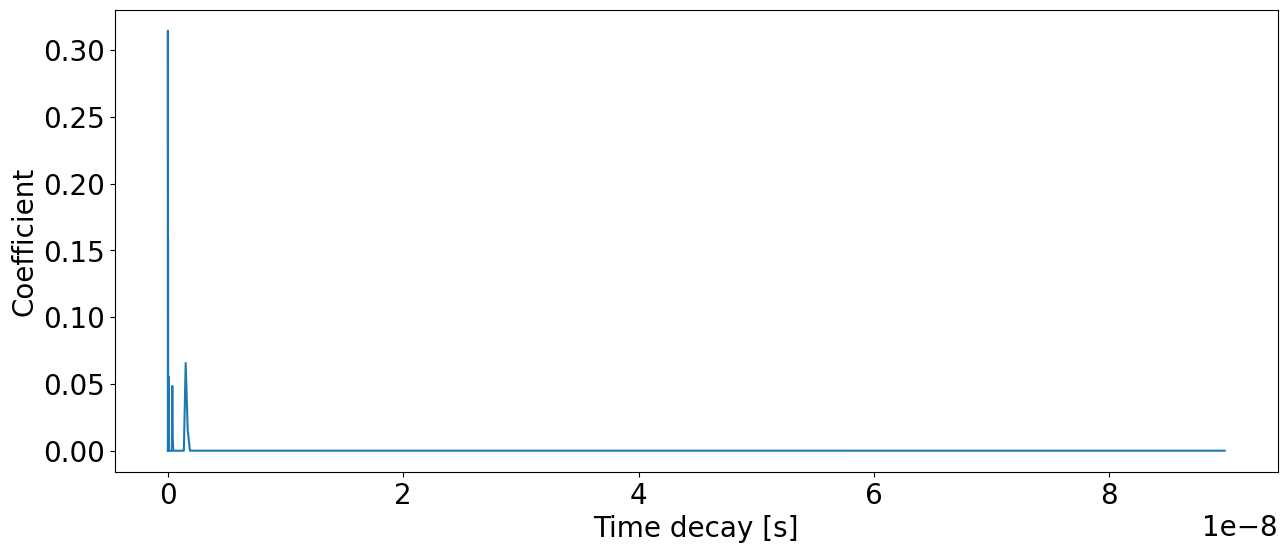

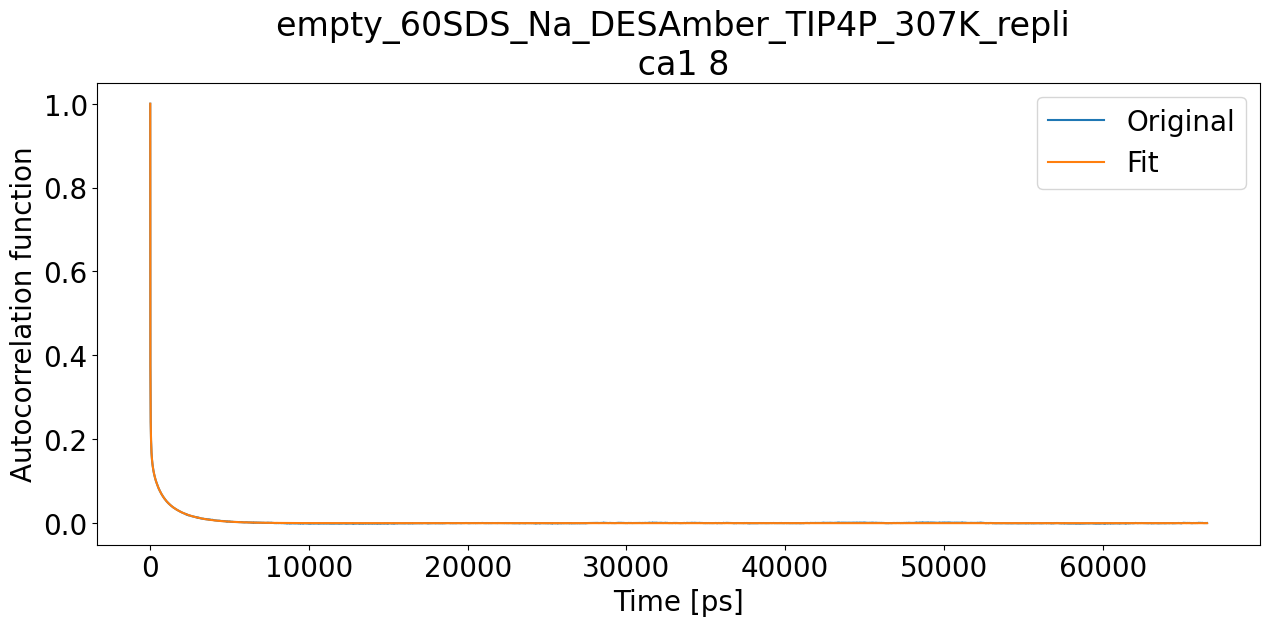

T1: 0.022141842628287087 T2: 0.0164418028152423 NOE: 0


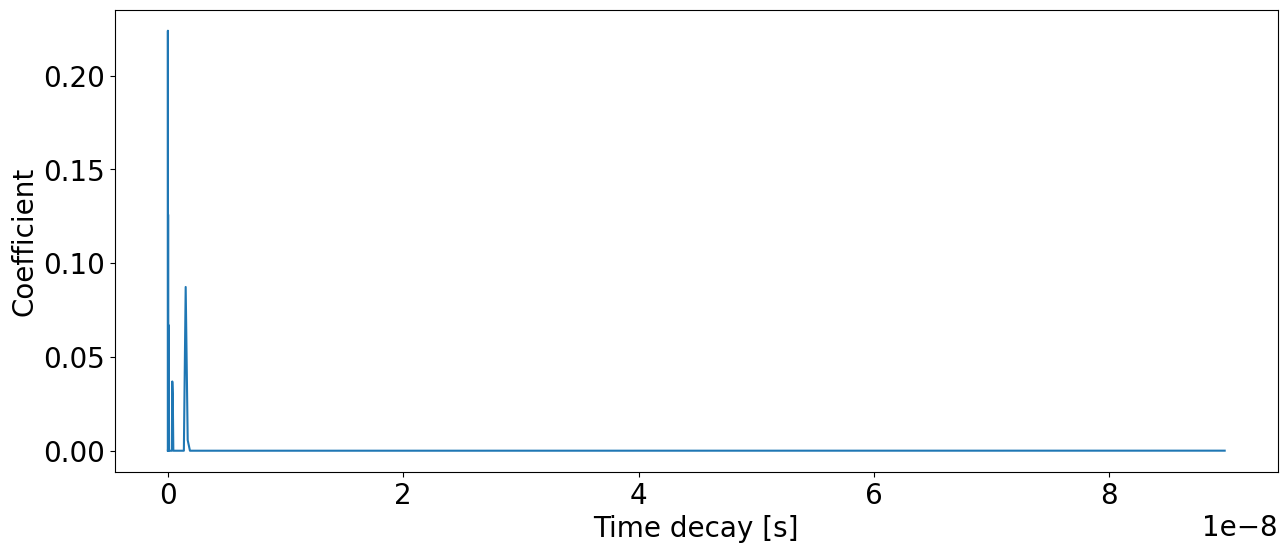

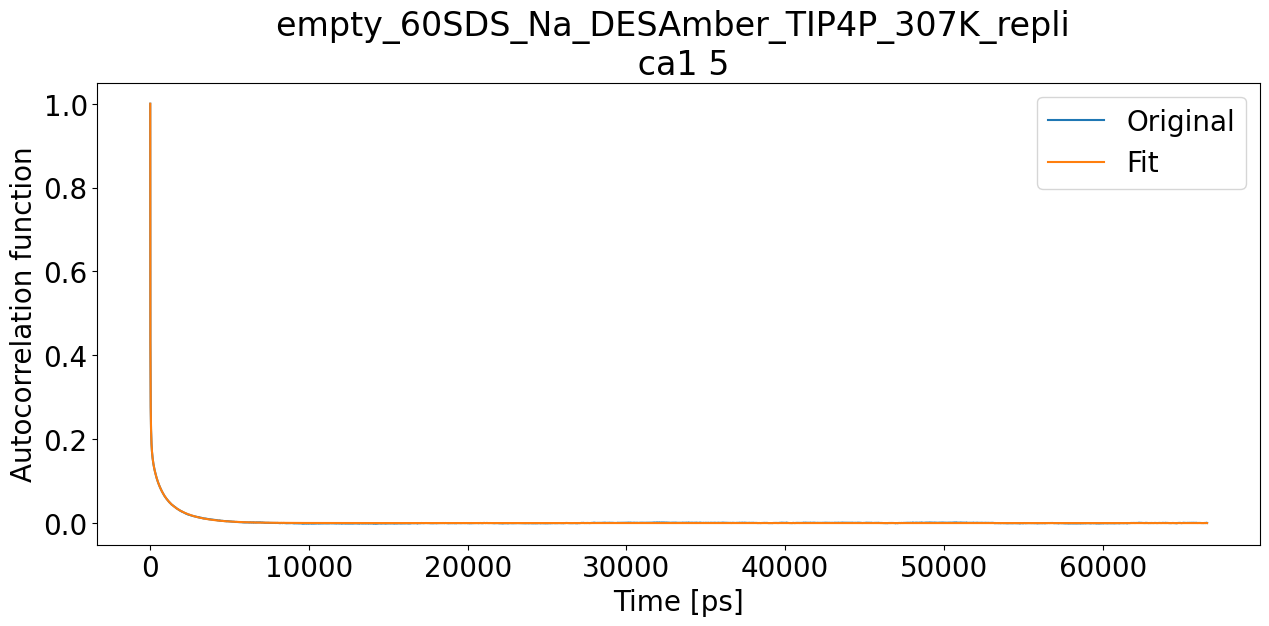

T1: 0.01969388953572074 T2: 0.01446432637450683 NOE: 0


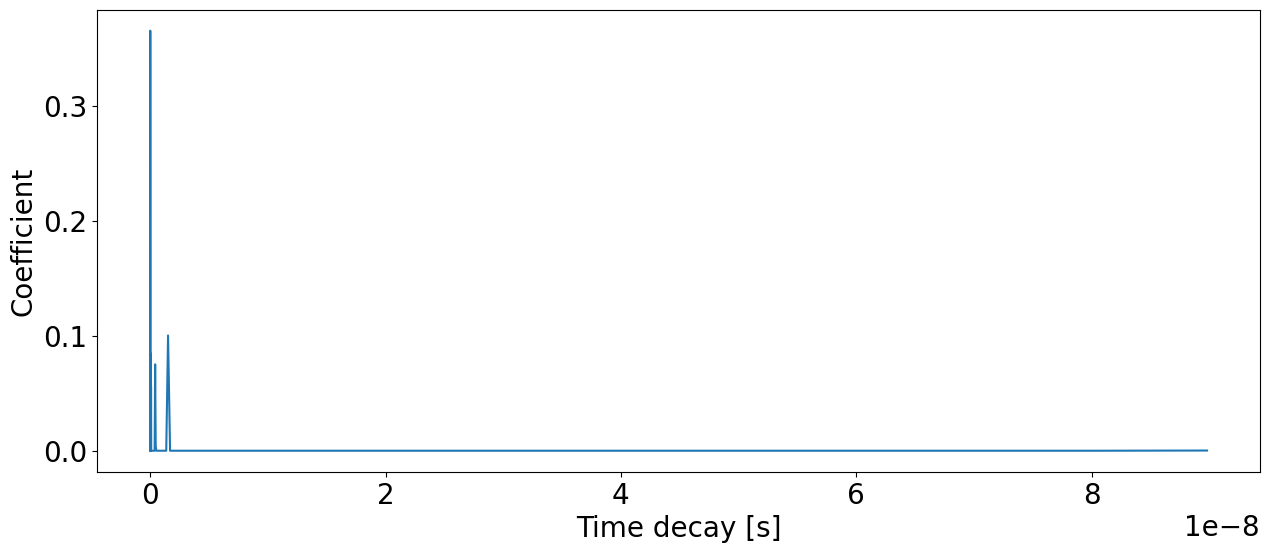

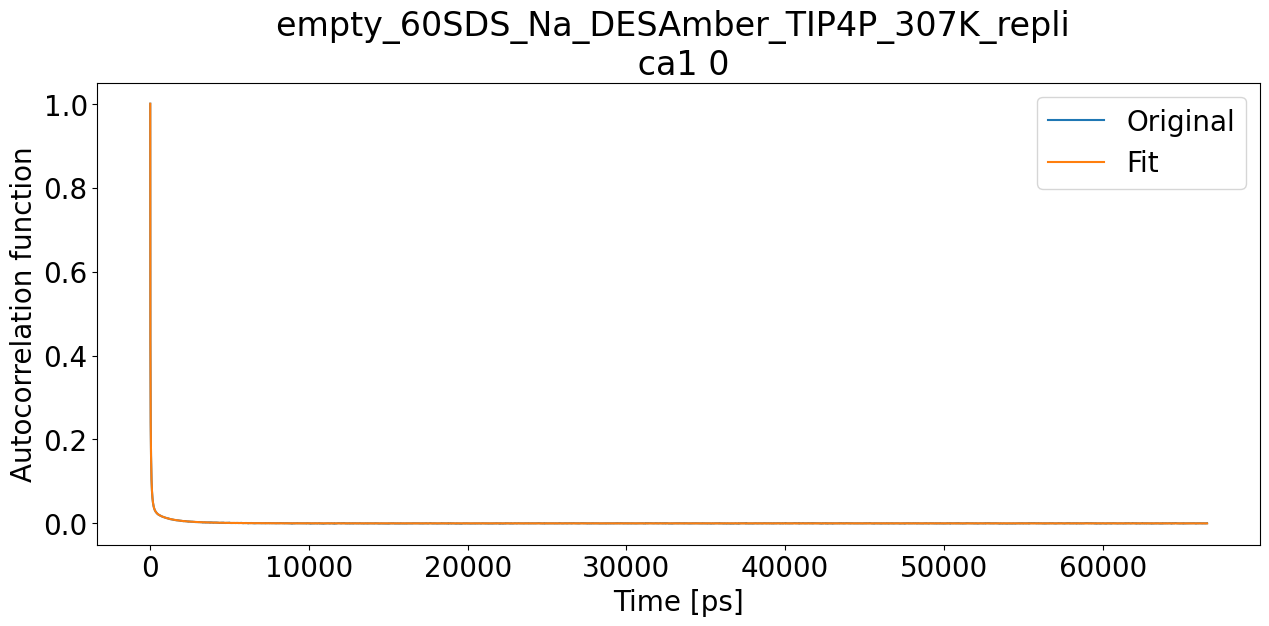

T1: 0.05324302492356816 T2: 0.044207279502860714 NOE: 0
empty_60SDS_Na_DESAmber_TIP4P_293K_replica1


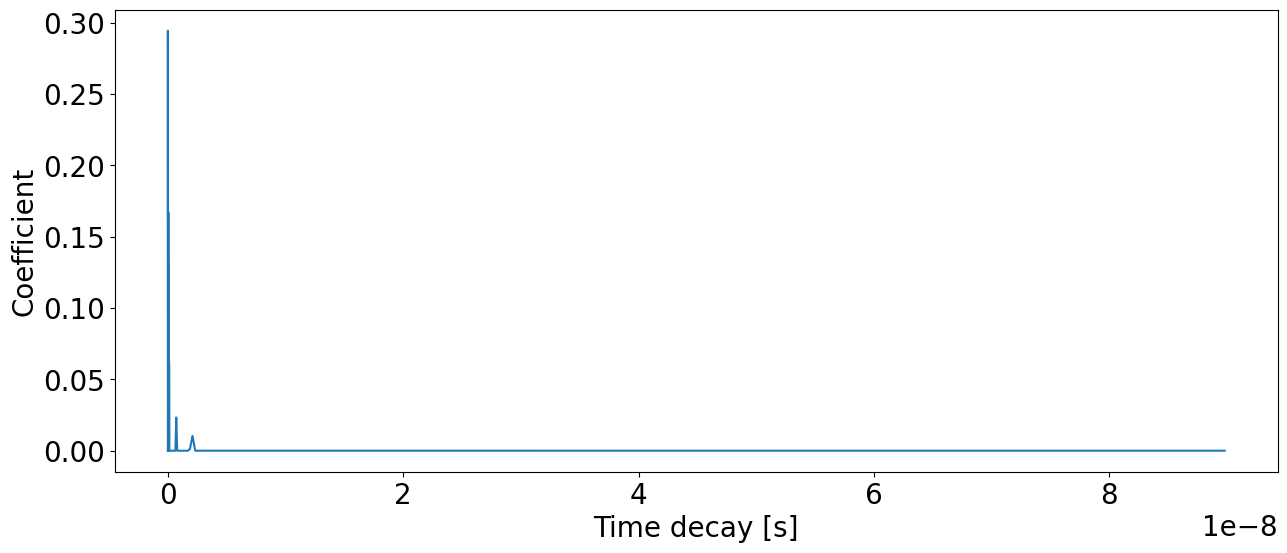

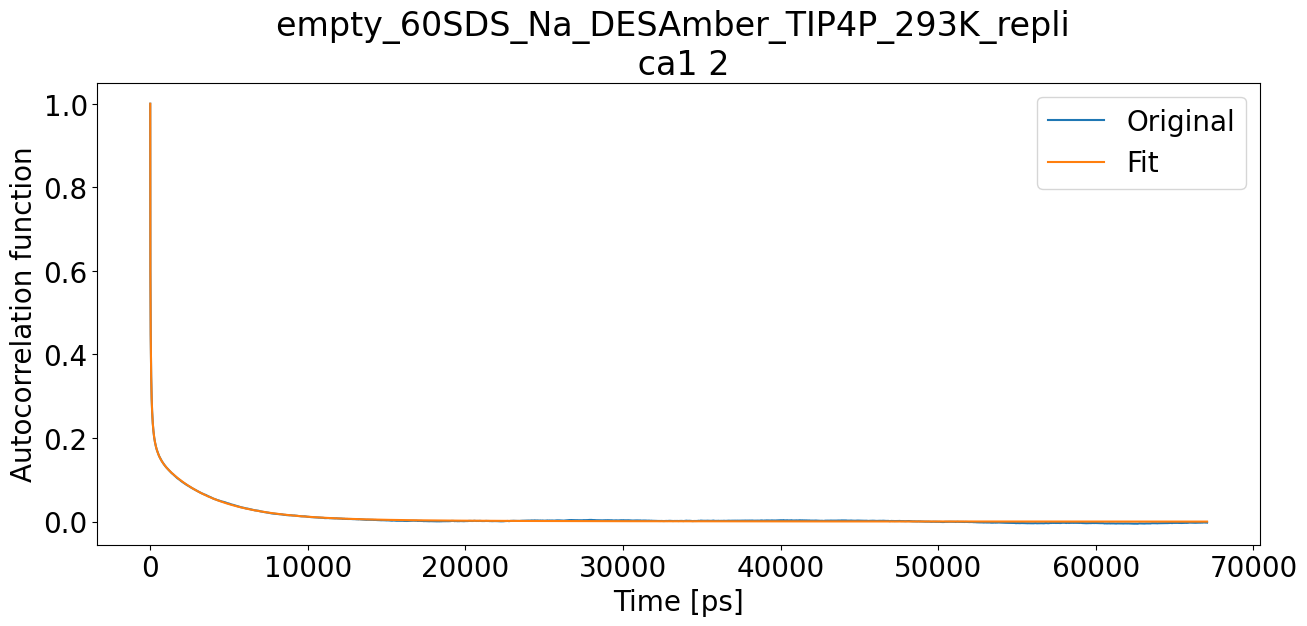

T1: 0.01532156321069408 T2: 0.006448458099914853 NOE: 0


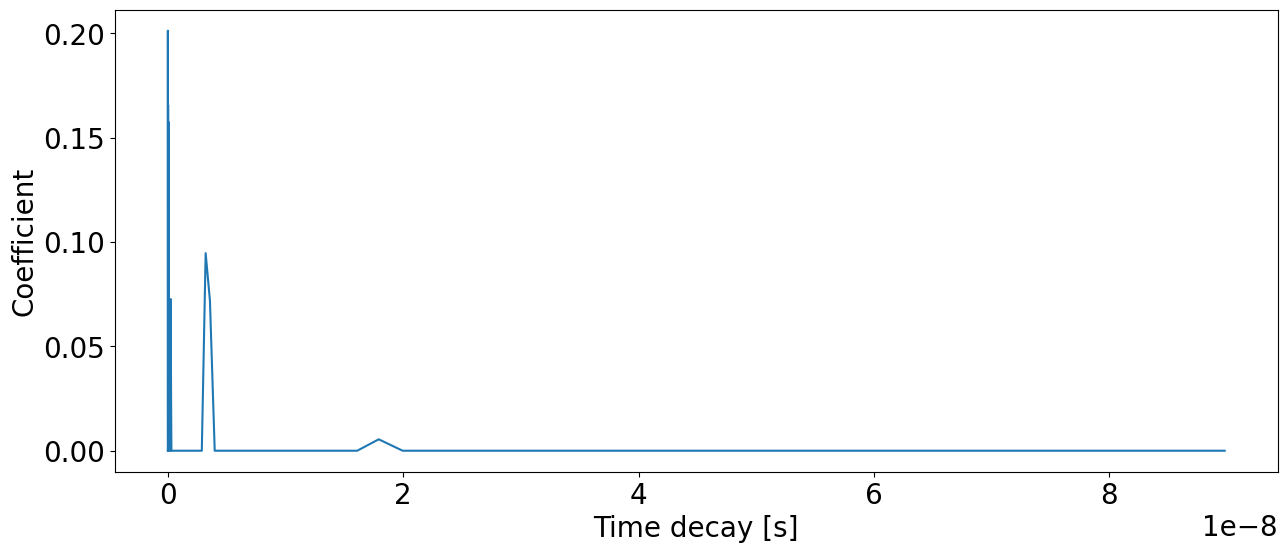

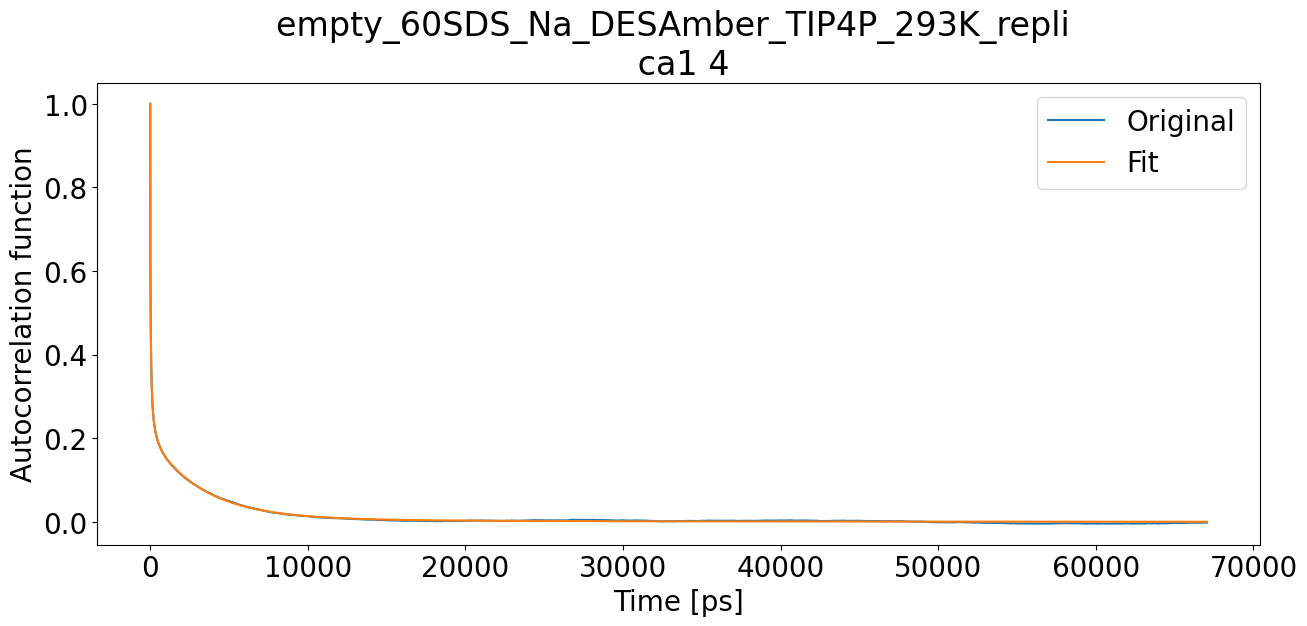

T1: 0.013328403220137097 T2: 0.0055504863751414816 NOE: 0


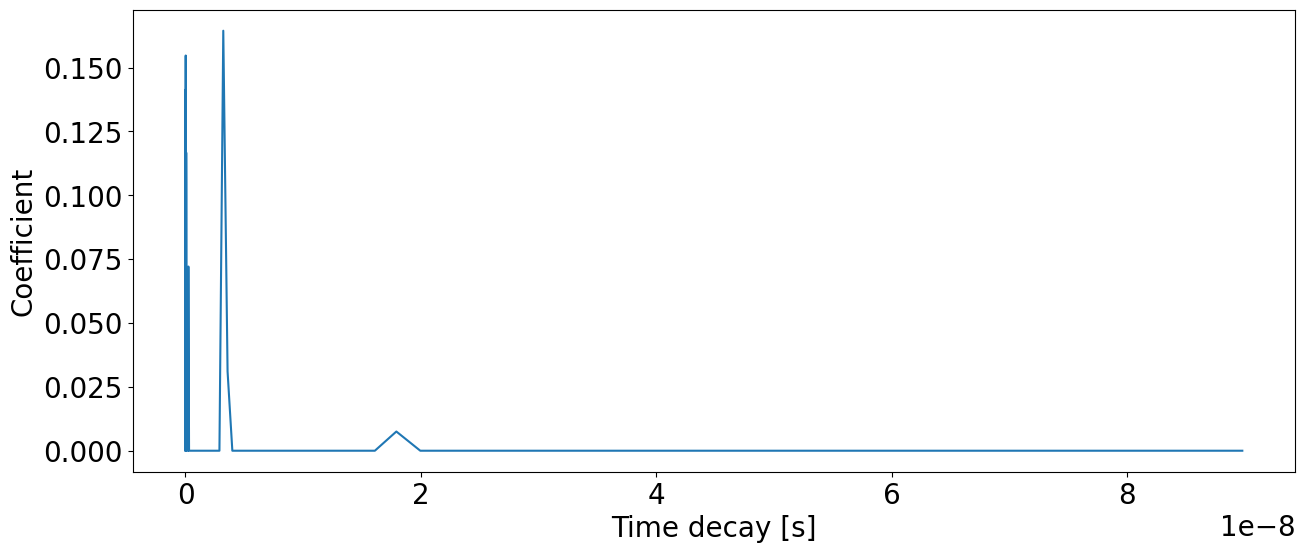

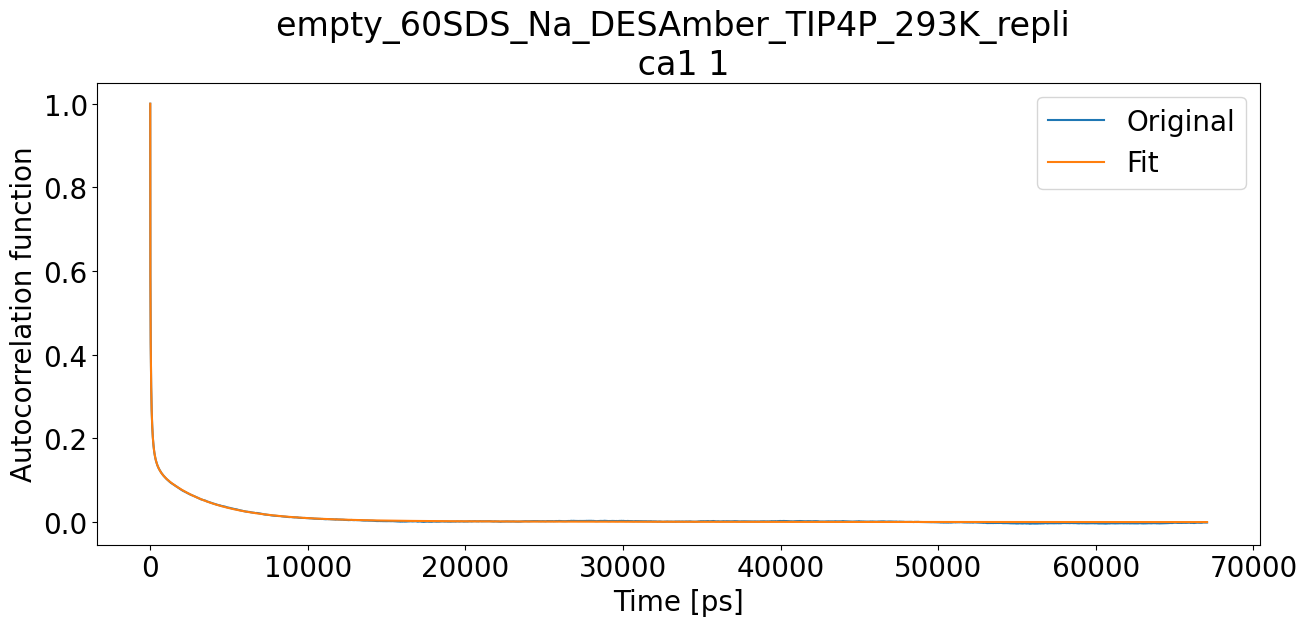

T1: 0.017796522063495968 T2: 0.00777713816938395 NOE: 0


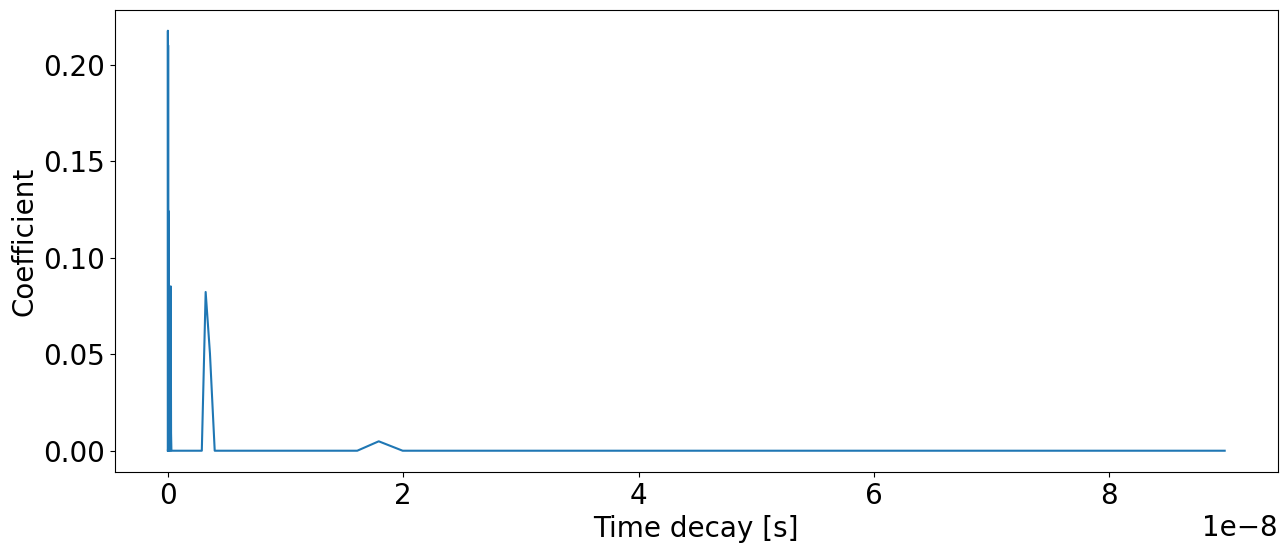

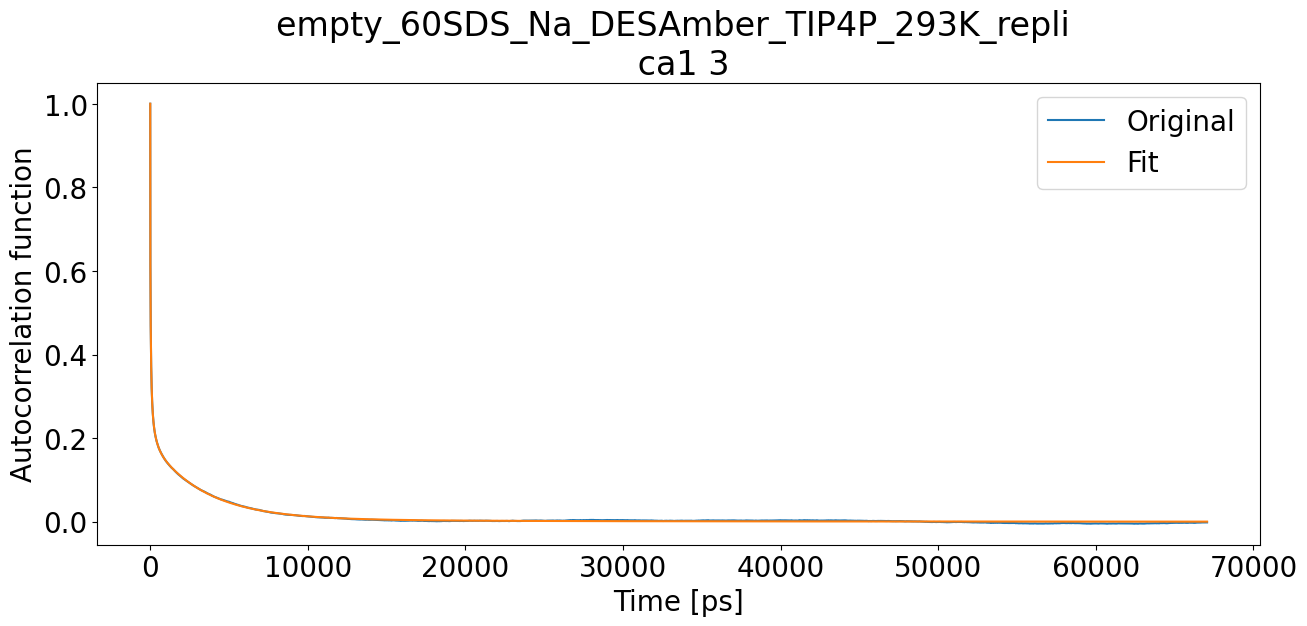

T1: 0.013939984559964525 T2: 0.005846310305230128 NOE: 0


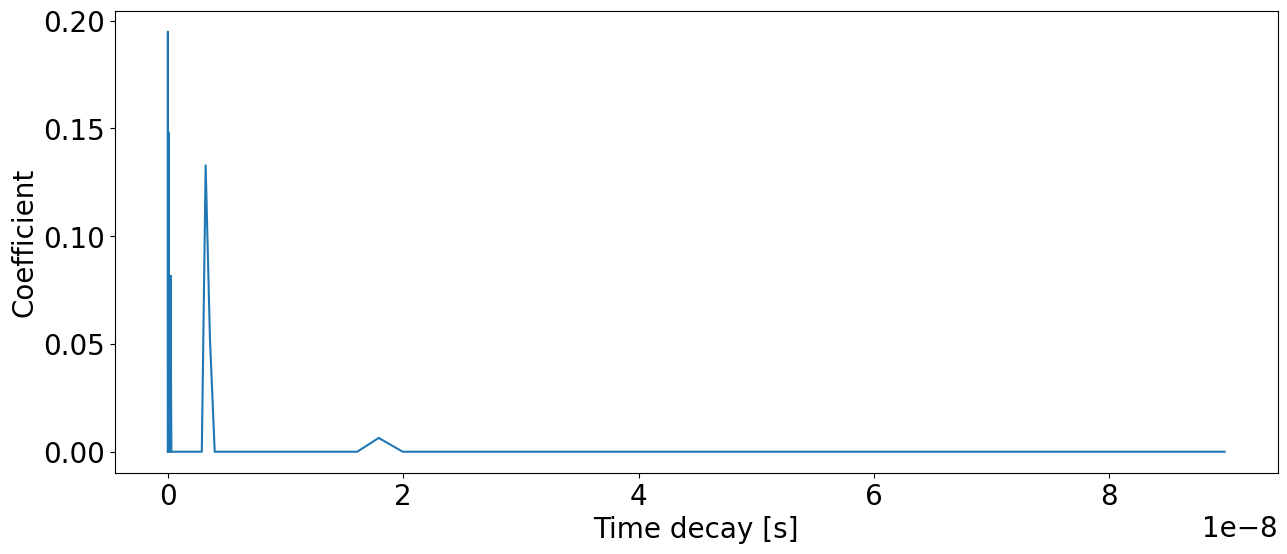

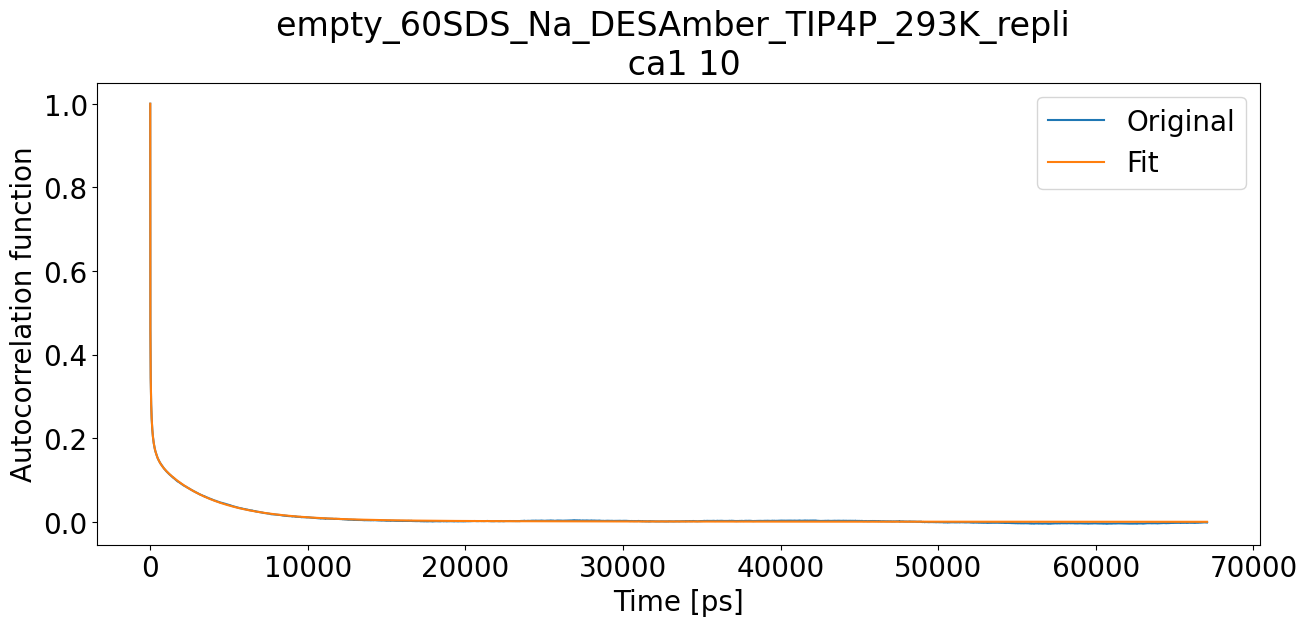

T1: 0.017405201567127795 T2: 0.007080021673747425 NOE: 0


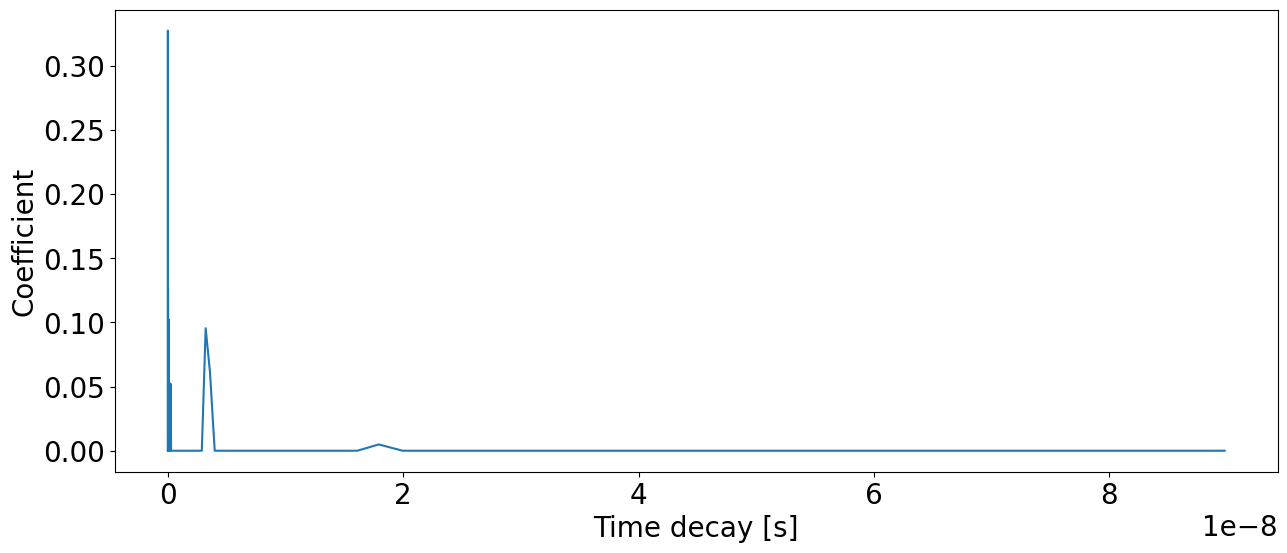

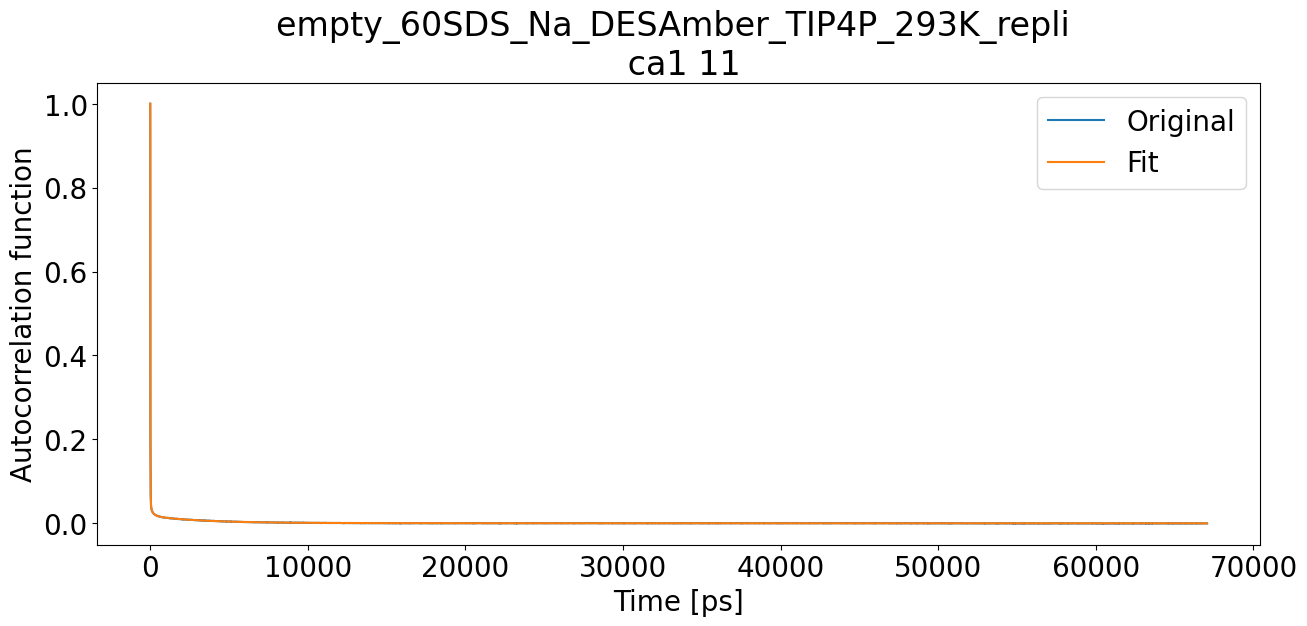

T1: 0.10899233338120021 T2: 0.05454291072345344 NOE: 0


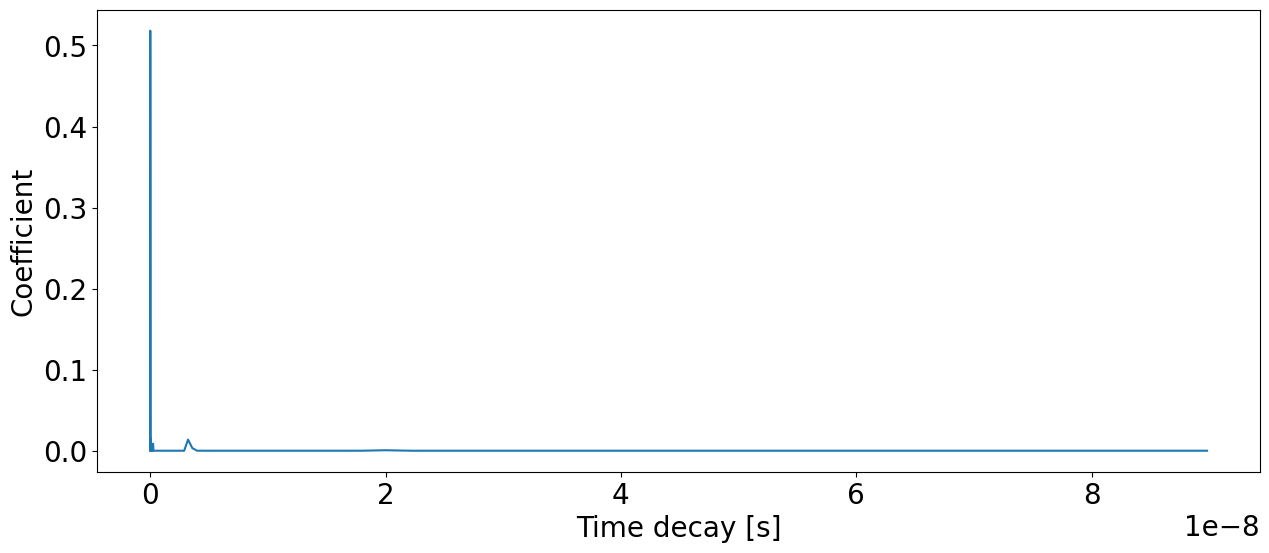

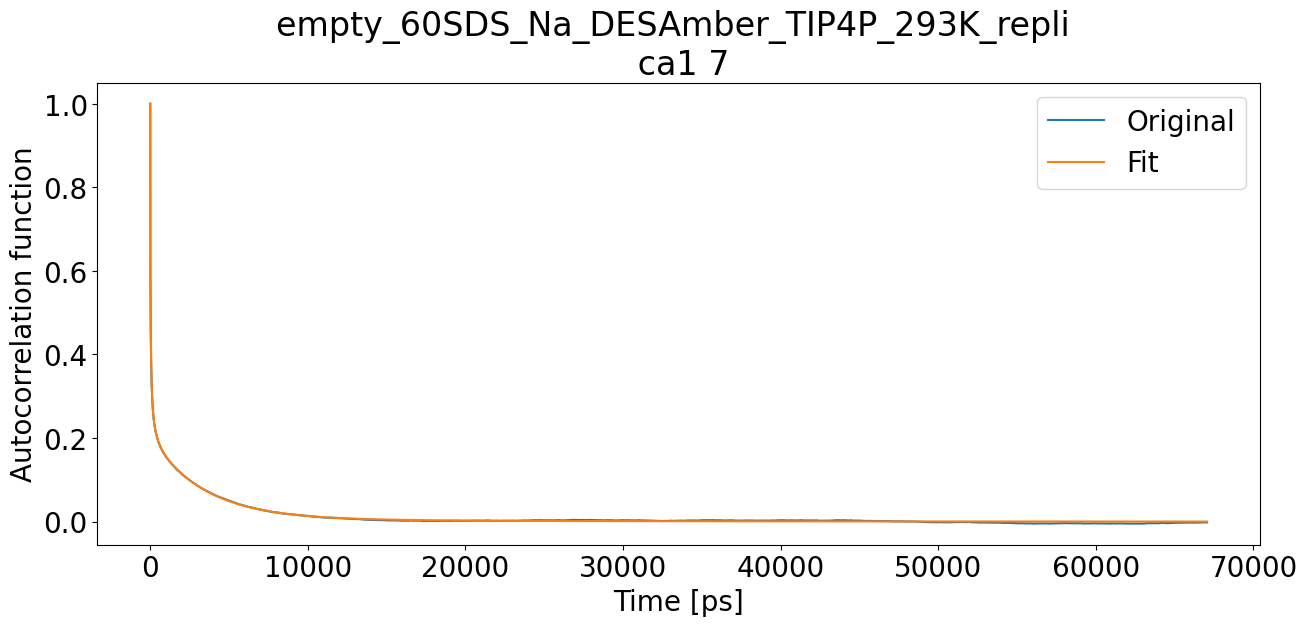

T1: 0.013320007063070266 T2: 0.005538633077042977 NOE: 0


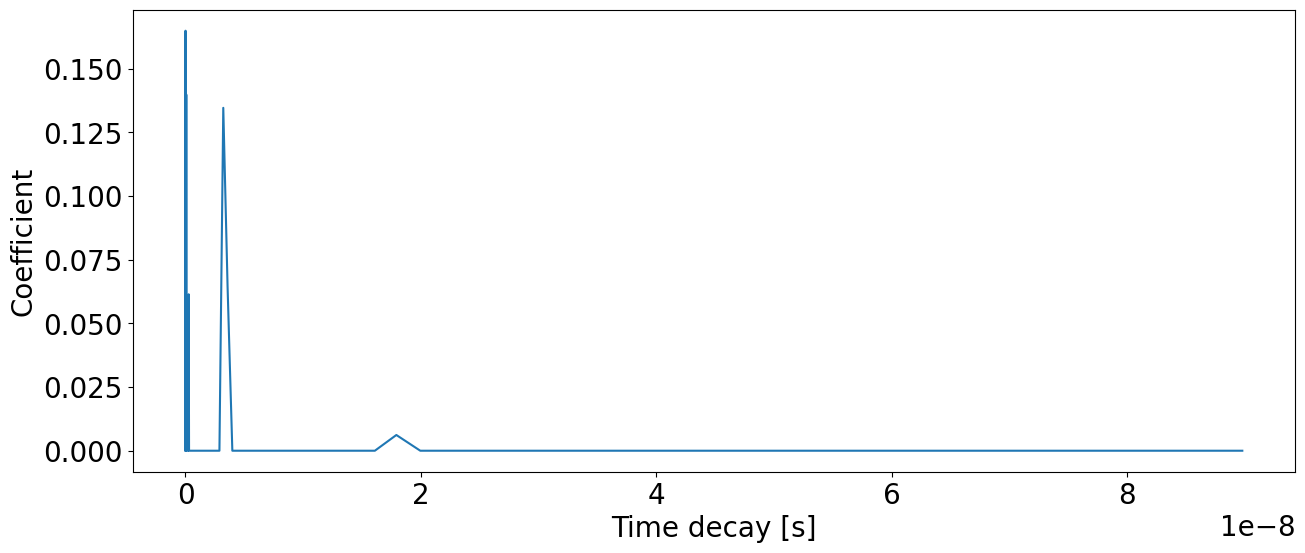

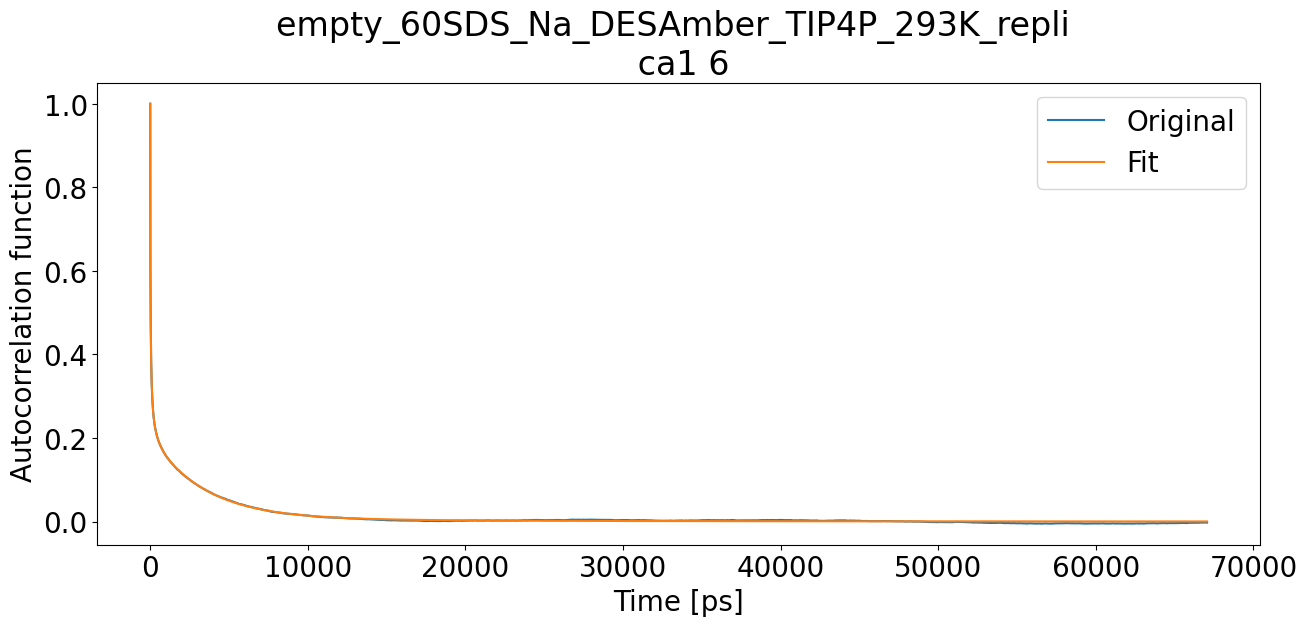

T1: 0.013159169236165467 T2: 0.0054671786669084855 NOE: 0


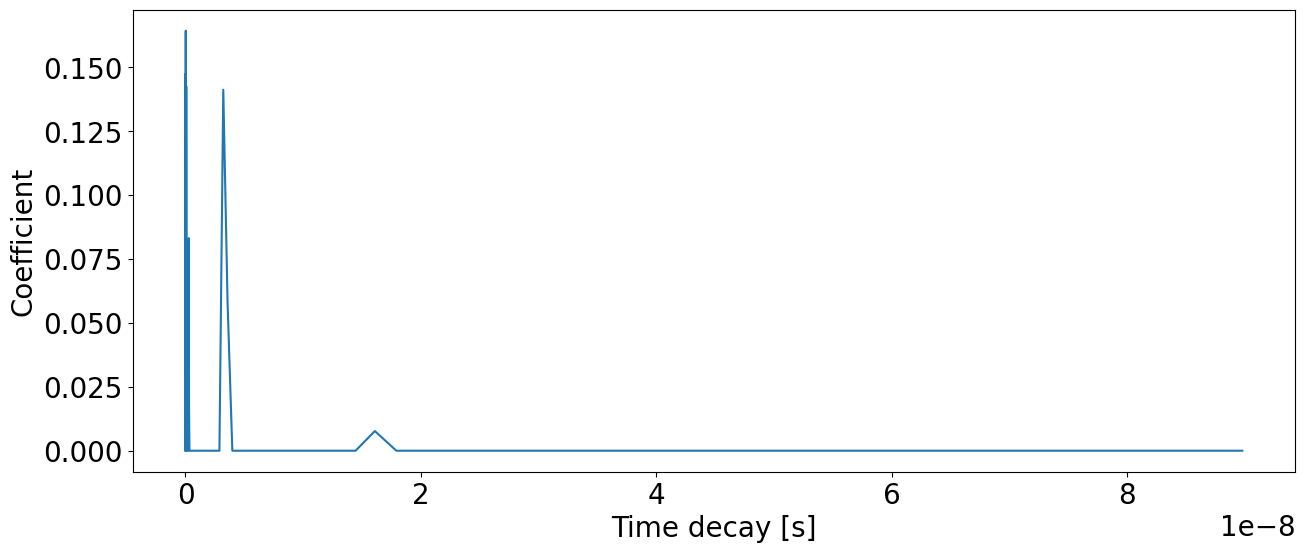

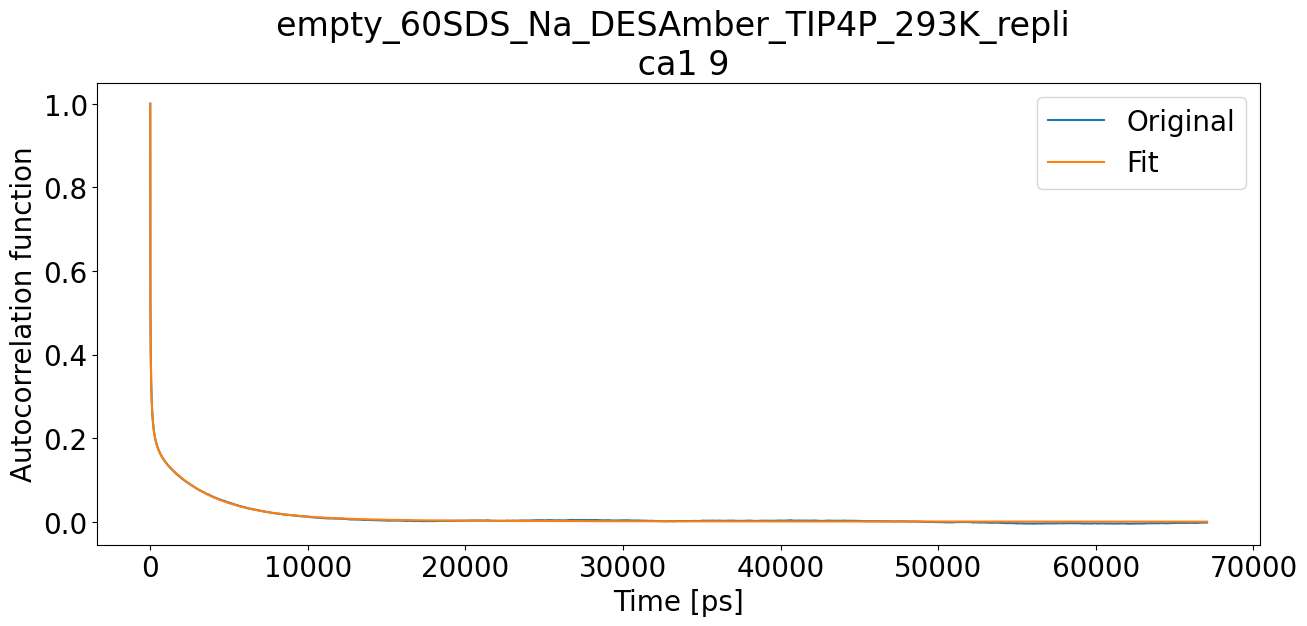

T1: 0.01482629394764771 T2: 0.006116284127004006 NOE: 0
correl function should exist


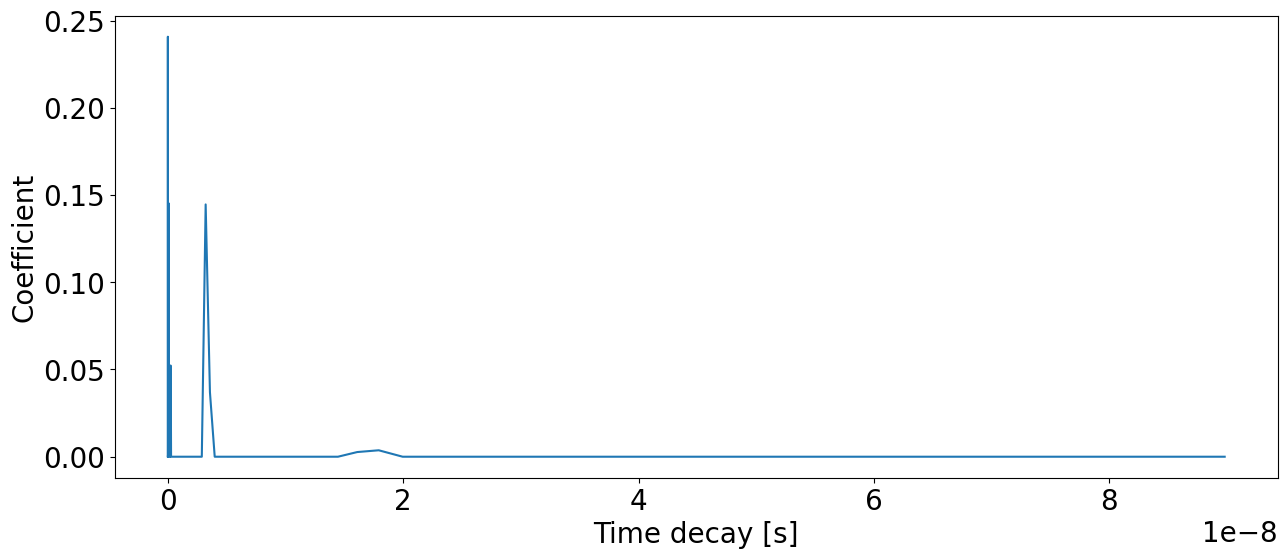

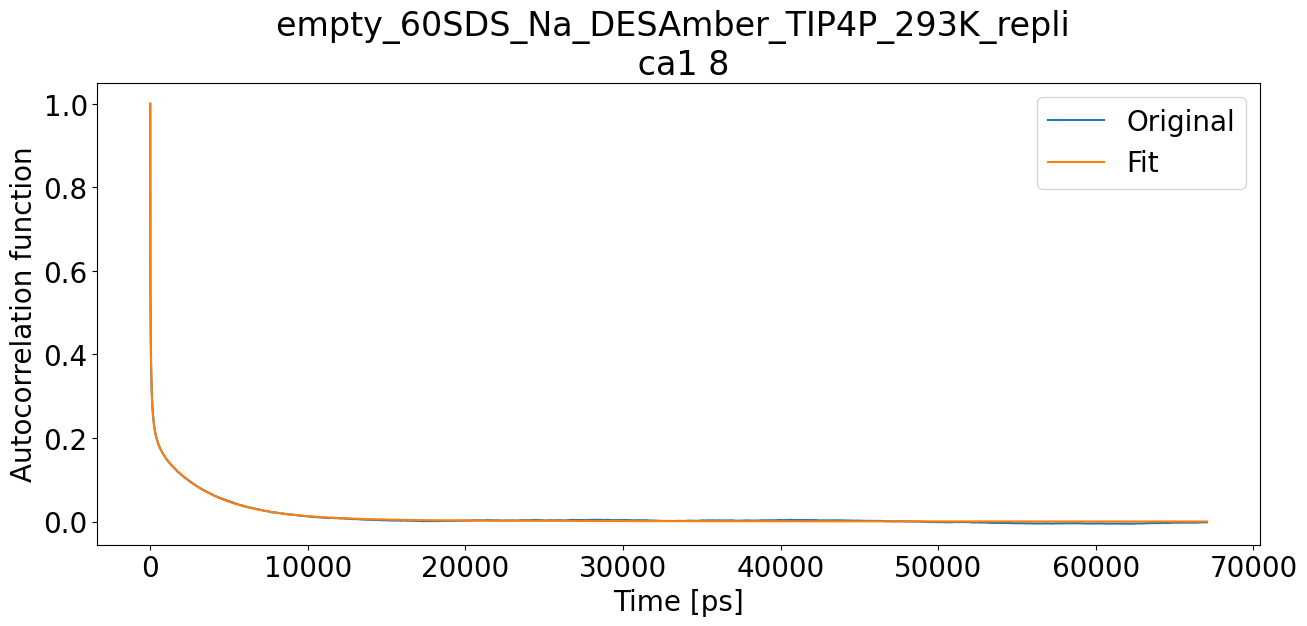

T1: 0.013742263812599197 T2: 0.005700791076130055 NOE: 0


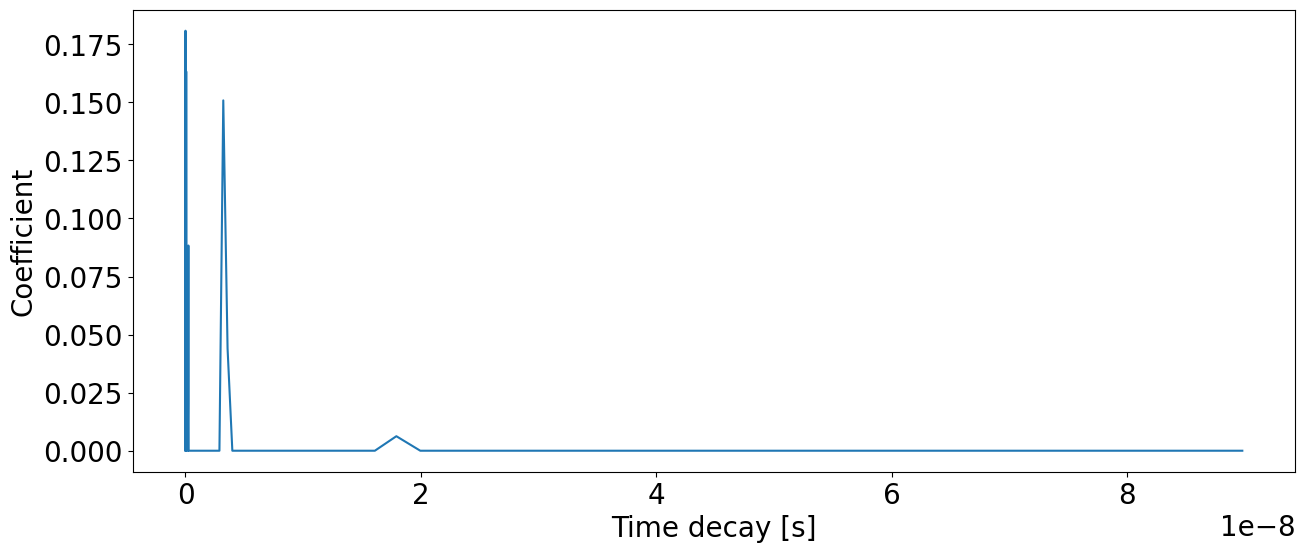

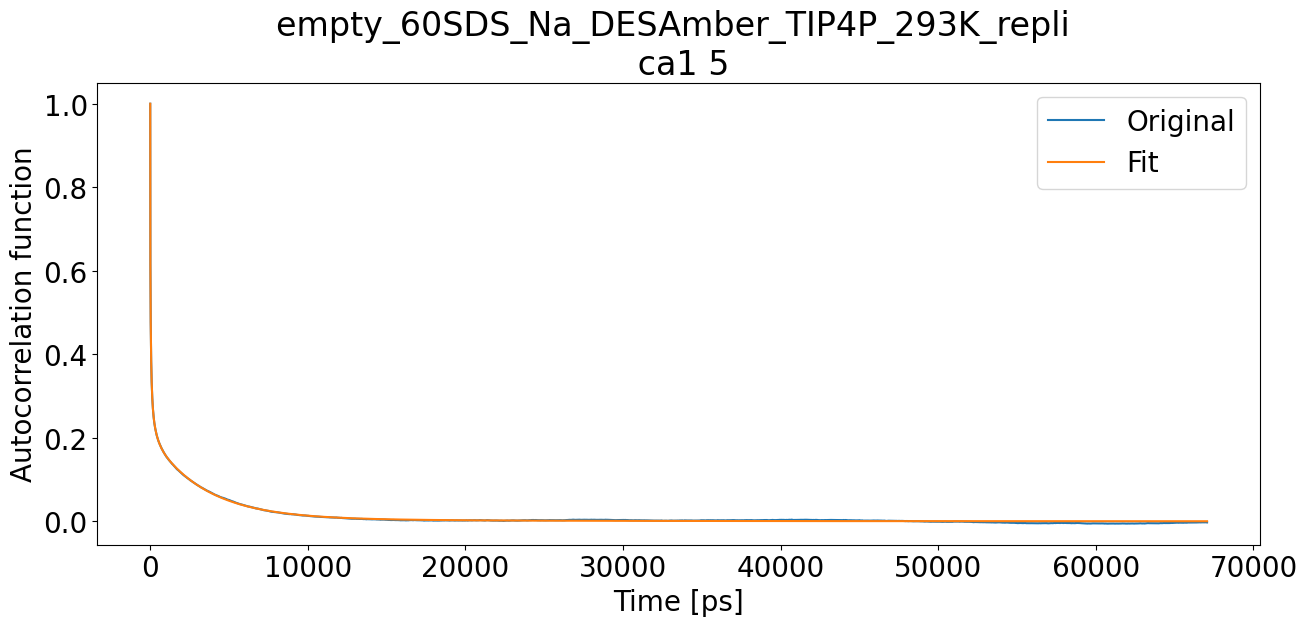

T1: 0.013124486553718015 T2: 0.00551351884183993 NOE: 0


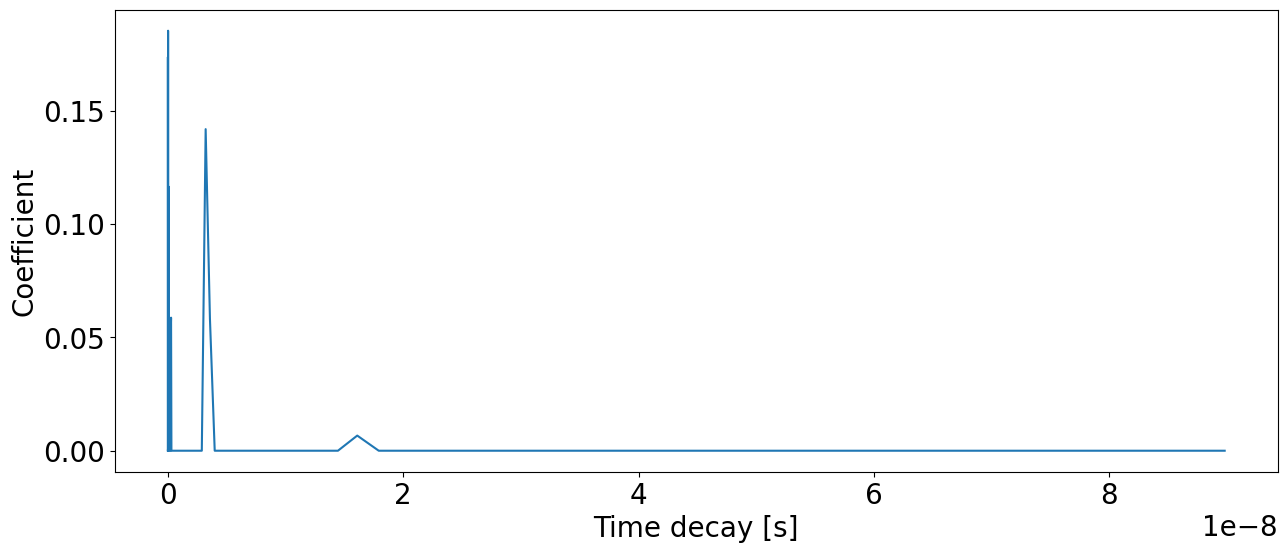

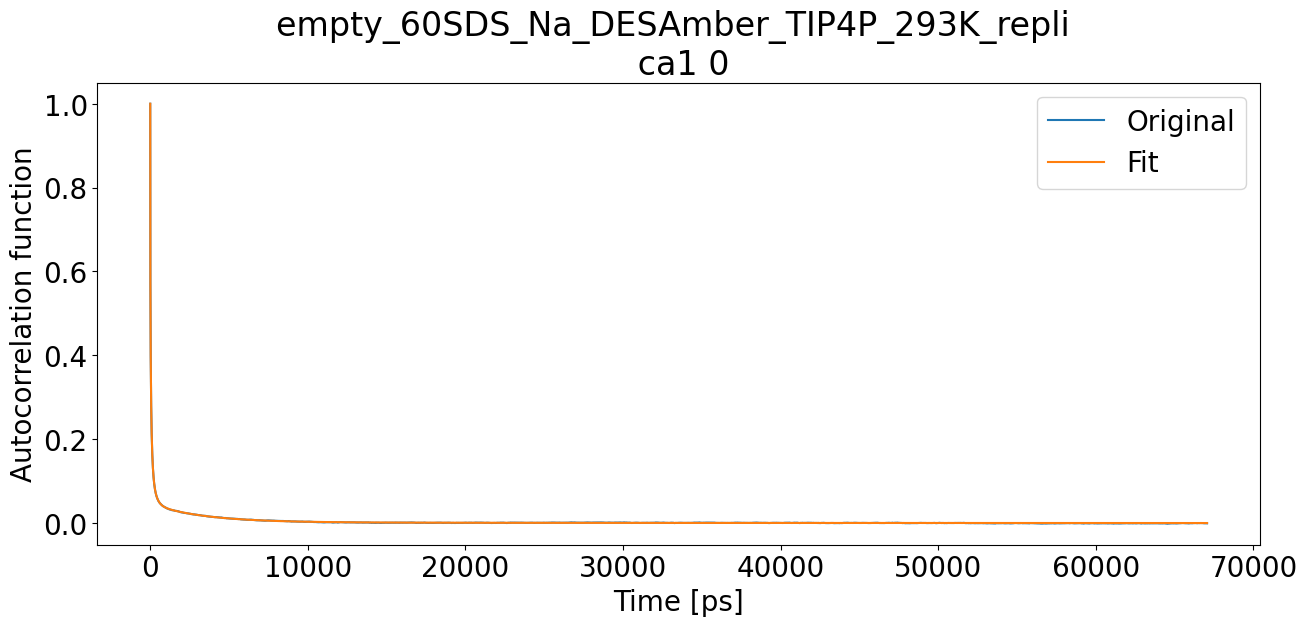

T1: 0.028314714965961933 T2: 0.016735609886341263 NOE: 0


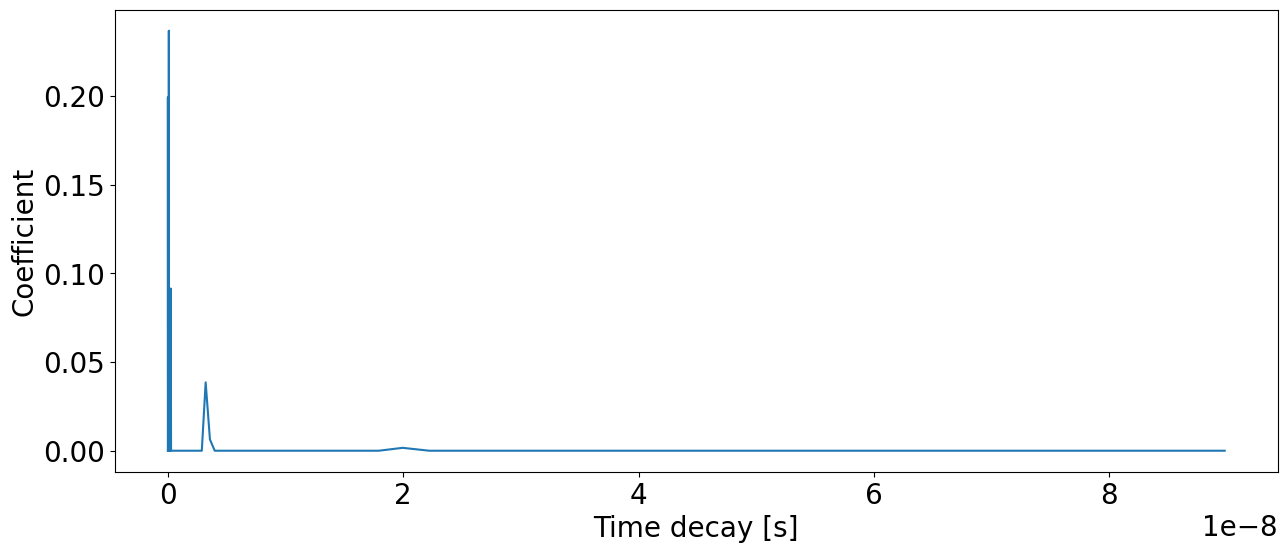

In [15]:
"""Analyze many systems in a parent folder"""
calculated_systems={}
for file in os.listdir(parent_folder_path):
    folder_path = parent_folder_path+os.fsdecode(file)+"/"
    for system in systems:
        if (fnmatch.fnmatch(os.fsdecode(file), "*"+system+"*")):
            print(os.fsdecode(file))
            calculated_systems[os.fsdecode(file)]=rt.analyze_all_in_folder(OP,smallest_corr_time, biggest_corr_time, N_exp_to_fit,analyze,magnetic_field,folder_path,nuclei,output_path_relax,output_path_timescales,output_name=None)
            

<h3>6) Plot results</h3>
<h4> Read in data</h4>
Reads in all the data that exists in "output_path_relax", and "output_path_timescales"

In [2]:
output_path_relax="../../CorysPeptides/relax_times_yamls/protein/averages/"            # folder to save spin relaxation times yaml files, 
                                      # defined above or redefine here 
output_path_timescales="../../CorysPeptides/timescales_yamls/protein/averages/"  # folder to save timescale yaml files
                                      # defined above or redefine here

relaxation_yamls,timescales_yamls=mf.load_yaml_files(output_path_relax,output_path_timescales)

Spin relaxation data exist for:

   * eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_average
   * mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * eYqJd_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average

 
Timescales exist for:

   * eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_average
   * mag2_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * eYqJd_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * hMff_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * yFis1_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average
   * eElab_micelle_50SDS_CHARMM_310K_Na_Neut_OPC_average


<h4> Check which analysis done</h4>
All the analysis done before are stored here, check and select which one you want to use

In [3]:
mf.what_analysis_done(timescales_yamls["hMff_45SDS_s"])

nuclei : 15N , analyzed in:  ['analysis0', 'analysis1']
*
magnetic_field_[T] : 19.964291496497925 , analyzed in:  ['analysis0', 'analysis1']
*
magnetic_field_[MHz] : 850.0 , analyzed in:  ['analysis0', 'analysis1']
*
N_exp_to_fit : 100 , analyzed in:  ['analysis0', 'analysis1']
*
smallest_corr_time_[s] : 1e-12 , analyzed in:  ['analysis0', 'analysis1']
*
biggest_corr_time_[s] : 1e-07 , analyzed in:  ['analysis0', 'analysis1']
*
analyze : 0.019230769230769232 , analyzed in:  ['analysis0']
analyze : 0.0196078431372549 , analyzed in:  ['analysis1']
*
OP : 0 , analyzed in:  ['analysis0', 'analysis1']
*
corr_func_length_[ps] : 5200.0 , analyzed in:  ['analysis0']
corr_func_length_[ps] : 5100.0 , analyzed in:  ['analysis1']
*
saving_frequency_[ps] : 10.0 , analyzed in:  ['analysis0', 'analysis1']
*
xtc : non-Water_eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2.xtc , analyzed in:  ['analysis0', 'analysis1']
*


<h4>6.1) Plot T1, T2, hetNOE relaxation data</h4>

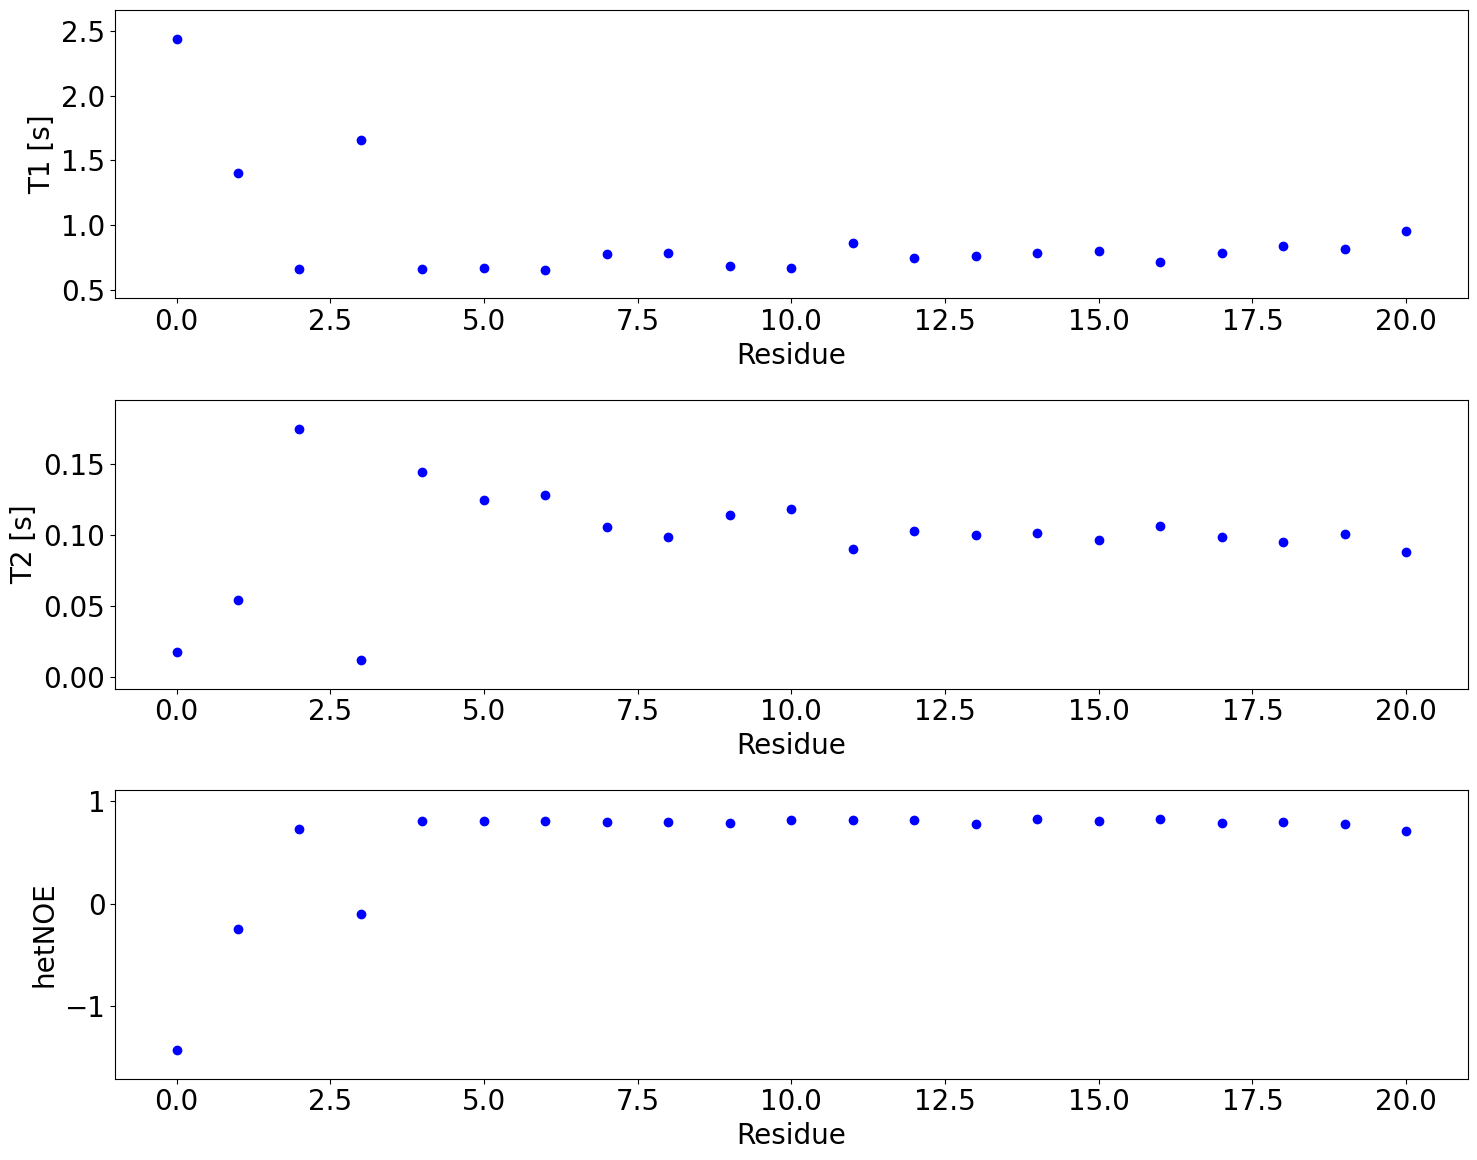

In [4]:
plot_output = "relax_times.pdf"   # name of the plot for saving
system =      "hMff_45SDS_s"        # system to be plotted
analysis =    "analysis0"         # analysis of the system to be plotted
pt.plot_T1_T2_noe(relaxation_yamls[system][analysis],plot_output)

<h4>6.2) Set y-axis range and categories to plot in different colors</h4>

In [16]:
merge=5 # number of consequent points to be merged (works on log scale!!)
groupTimes=[10**(-10),10**(-9),10**(-9)*5,10**(-8)] # groups points smaller than 1st value, 
                                                    #points between 1st and 2nd, 2nd and 3st....
                                                    #points bigger than the last value
ylim=[10**(-10),10**(-8)*2] # useful for observing details
ylim_weig=[0,1]
ylim=None # if None the whole range of available data is plotted
title="Time coefficients"
xlabel="Residue of hMff"
plot_output="time_scales.pdf"

<h4>6.2) Plot dynamics</h4>

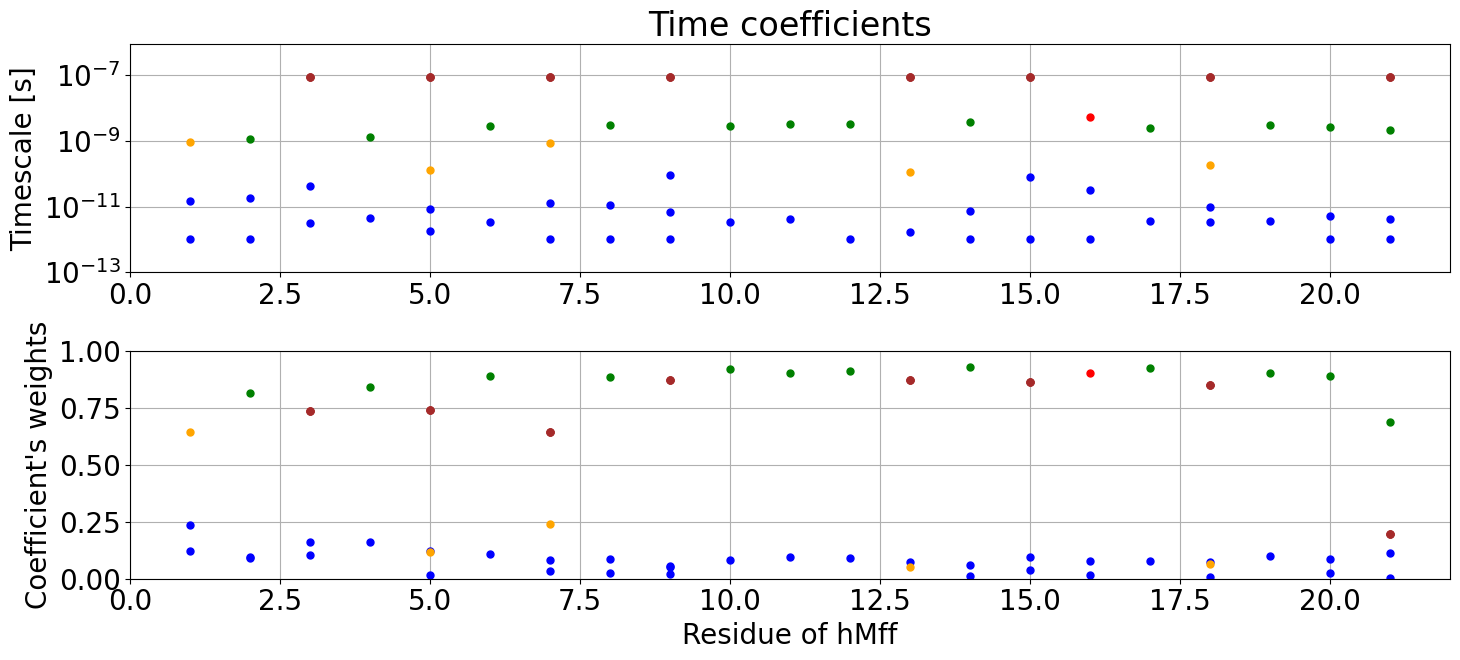

In [6]:
pt.PlotTimescales(timescales_yamls[system][analysis],merge,groupTimes,title,xlabel,ylim,ylim_weig,yscale,plot_output)

<h4>6.3) Plot of replicas</h4>

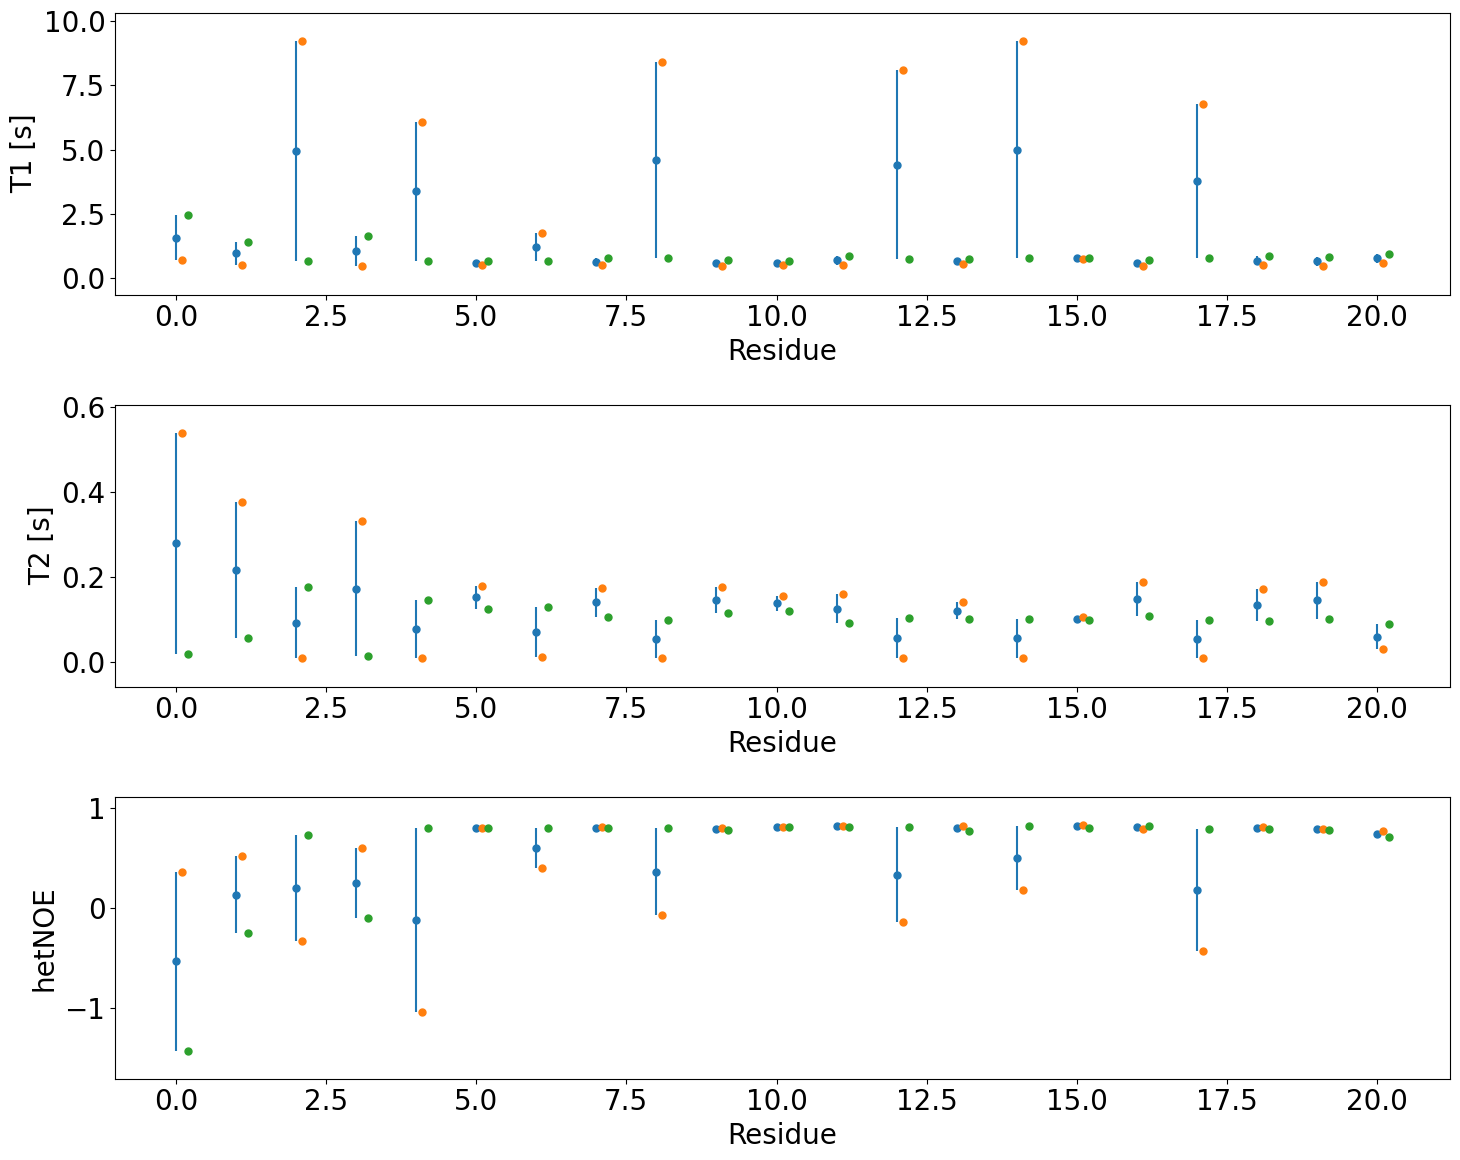

In [12]:
save_name="hMff_40_45_50_60SDS_850MHz.pdf"
plotType="average"   #average/all
                     # average - plot averages over "number" of replicas
                     # all - works with "number"==1 , plots all systems independently
number=2
system1=relaxation_yamls["hMff_45SDS_s"]["analysis0"]
system2=relaxation_yamls["non-Water_eElab_micelle_40SDS_CHARMM_310K_Na_Neut_OPC_replica2"]["analysis0"]
replicas=[system1,system2,system2,system2,system1,system1]
pt.plot_replicas(save_name,plotType,number,*replicas)

<h4>6.4) Plot of timescales for replicas</h4>

In [3]:
merge=5 # number of consequent points to be merged (works on log scale!!)
groupTimes=[10**(-10),10**(-9),10**(-9)*5,10**(-8)] # groups points smaller than 1st value, 
                                                    #points between 1st and 2nd, 2nd and 3st....
                                                    #points bigger than the last value
ylim=[0,10**(-8)*1] # useful for observing details
ylim_weig=[0,1]
#ylim=None # if None the whole range of available data is plotted
title="Timescales of AA of peptides in SDS micelles"
xlabel="Residue of a peptide"
plot_output="time_scales.pdf"
yscale="lin" #log/lin  logarithim/linear scale

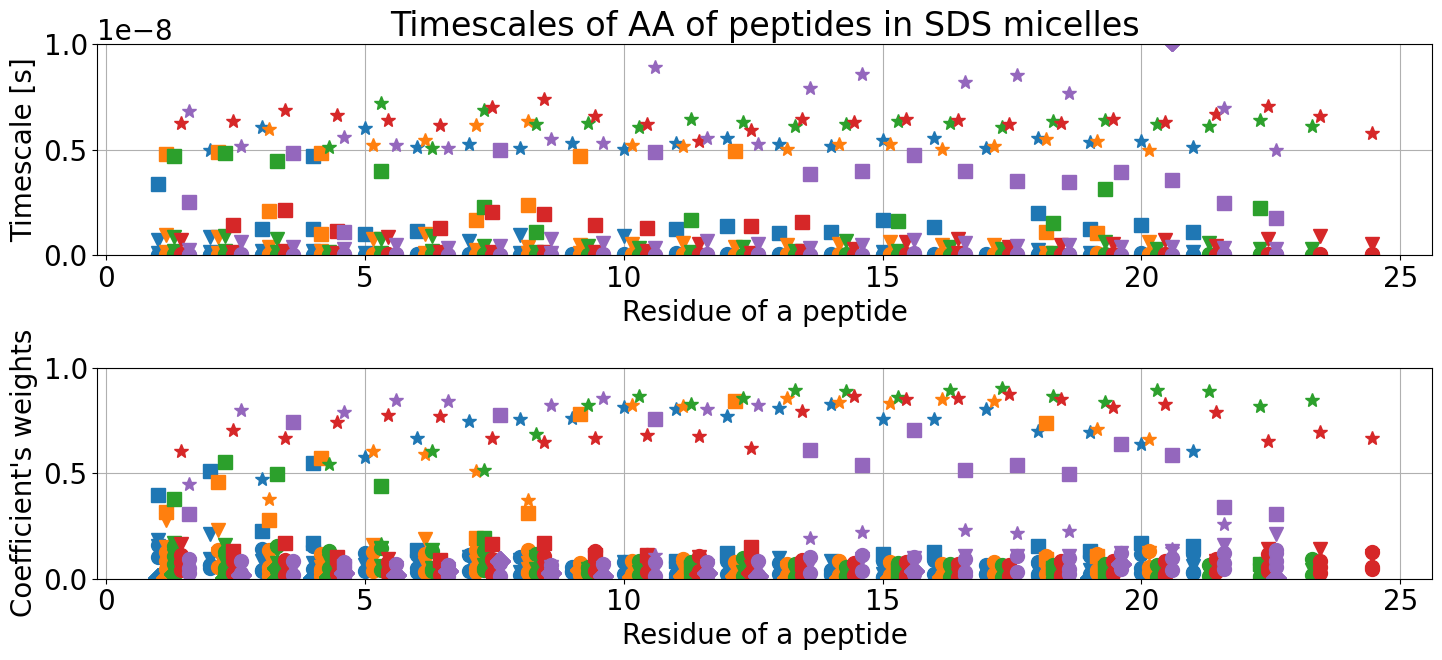

In [128]:
pt.PlotTimescales_replicas(merge,groupTimes,title,xlabel,ylim,ylim_weig,yscale,*aminoAcids)

<h4>6.5) Plot of timescales for replicas, second option</h4>

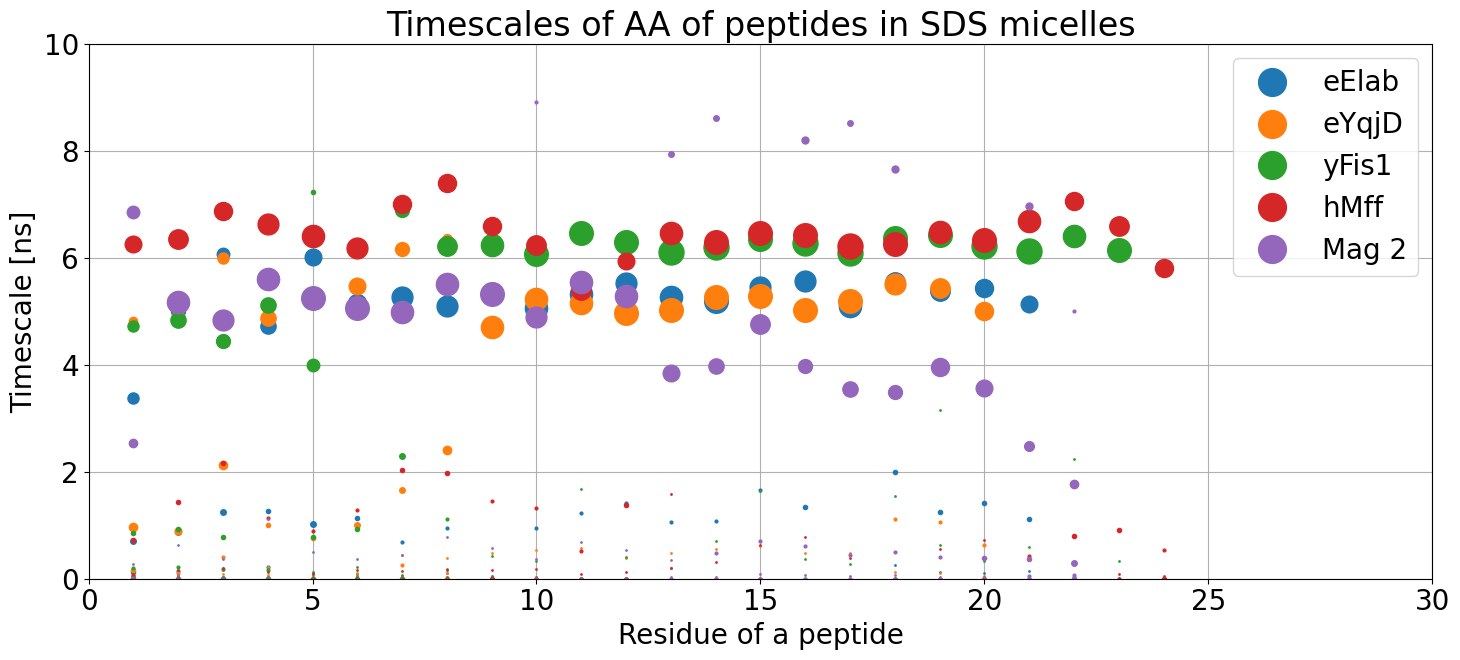

In [4]:
merge=5 # number of consequent points to be merged (works on log scale!!)
ylim=[0,10**(-8)*1] # useful for observing details
#ylim=None # if None the whole range of available data is plotted
title="Timescales of AA of peptides in SDS micelles"
xlabel="Residue of a peptide"
plot_output="time_scales.pdf"
yscale="lin" #log/lin  logarithim/linear scale
units=10**9 # 1- seconds, 10**3 ms, 10**6 us, 10**9 ns ...
shift=0 # shift points for different systems in x-axis, multiplies of 0.15

aminoAcidsReplicas=[]
for system in timescales_yamls:
    #print(system)
    aminoAcidsReplicas.append(timescales_yamls[system]["analysis0"])


labels=["eElab","eYqjD","yFis1","hMff","Mag 2"] #must have same dimention as aminoAcids
aminoAcids=[aminoAcidsReplicas[0],aminoAcidsReplicas[2],aminoAcidsReplicas[4],aminoAcidsReplicas[3],aminoAcidsReplicas[1]]

pt.PlotTimescales_replicas2(merge,shift,title,xlabel,ylim,yscale,units,labels,plot_output,*aminoAcids)

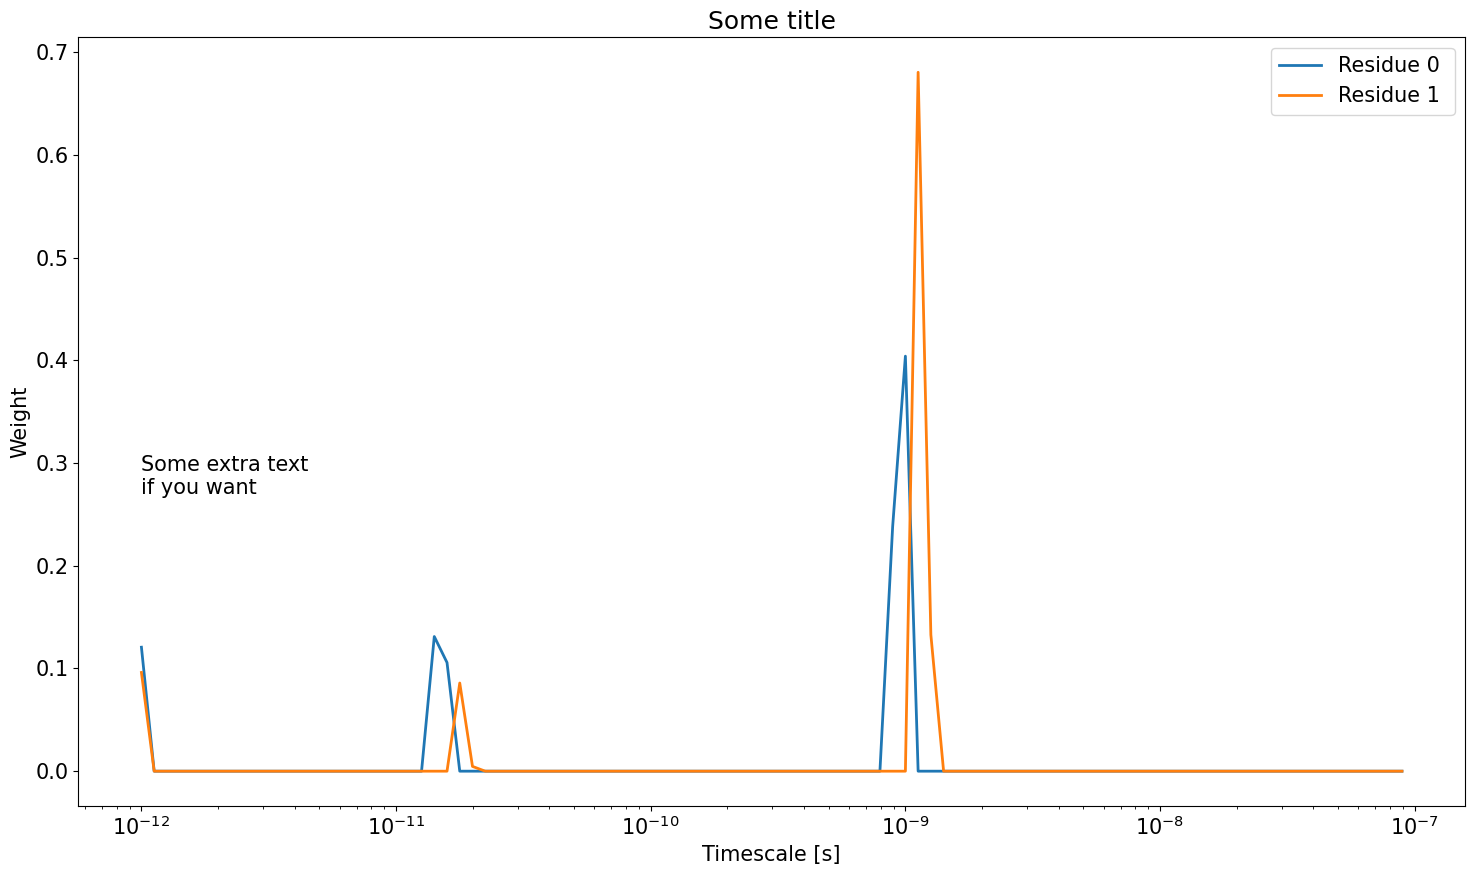

In [22]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

plt.rcParams["figure.figsize"] = [15.00, 9]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 15})

plt.xscale("log")


plt.plot(timescales_yamls["hMff_45SDS_s"]["analysis1"]["results"]["Ctime"],timescales_yamls["hMff_45SDS_s"]["analysis1"]["results"]["Coeff"][0],lw=2,label="Residue 0 ")

plt.plot(timescales_yamls["hMff_45SDS_s"]["analysis0"]["results"]["Ctime"],timescales_yamls["hMff_45SDS_s"]["analysis0"]["results"]["Coeff"][1],lw=2,label="Residue 1 ")


plt.legend()

plt.ylabel("Weight")
plt.xlabel("Timescale [s]")

plt.title("Some title")

plt.text(10**(-12),0.27,"Some extra text \nif you want")

plt.savefig("python_matlab_RL_1st.pdf")

<center><h1>7) Spin relaxation times as a function of field and dynamics</h1></center>

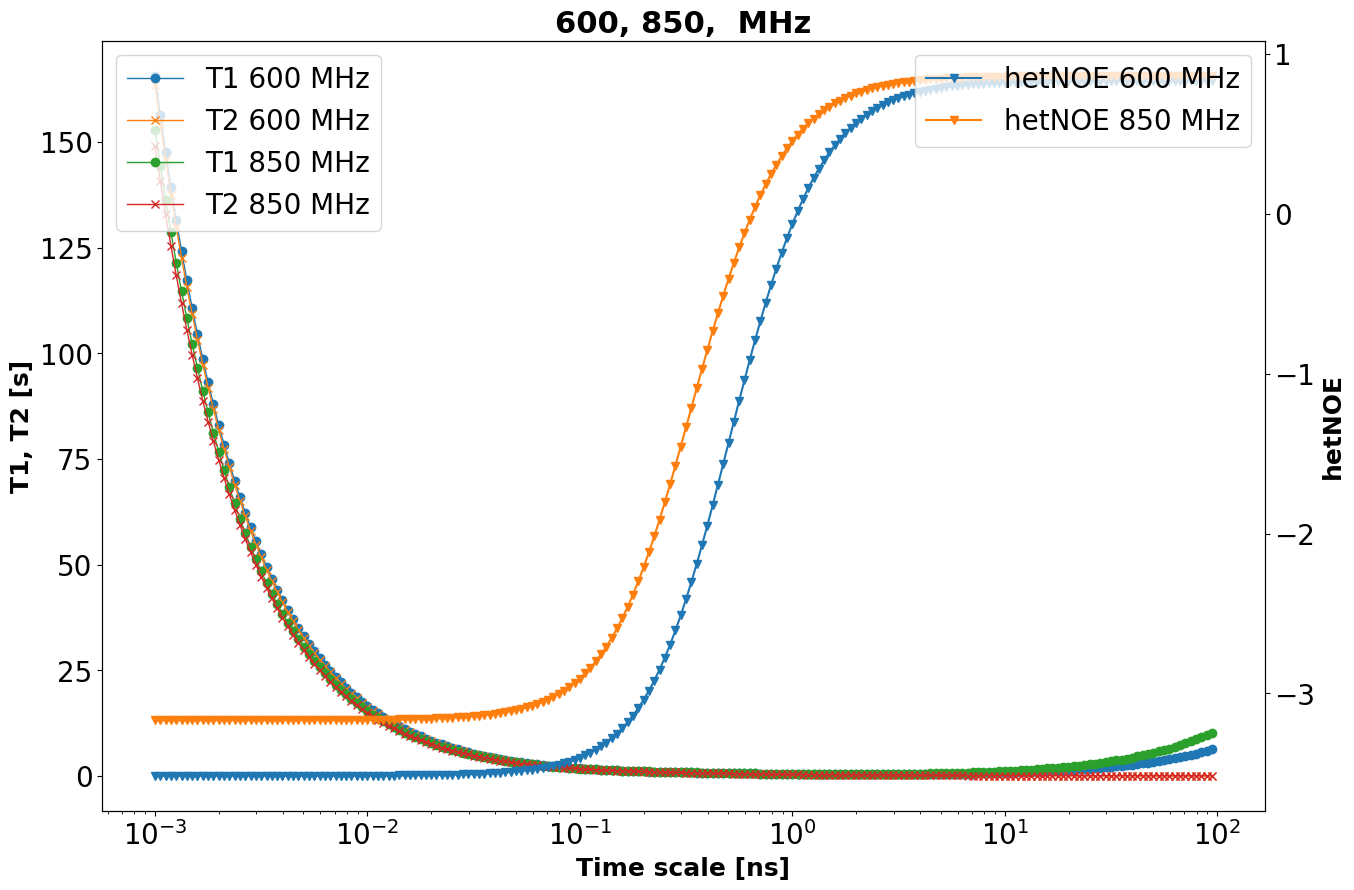

In [40]:
#plot relaxation times as a function of dynamics and magnetic field, only 2D plot, atm
magnetic_fields=[600,850]


smallest_corr_time=0 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=5 # same as above
N_exp_to_fit=200 # number of exponential functions to be fitted between the samlles and biggest corr time

step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
Ctimes = Ctimes * 0.001 * 10 ** (-9);

fig,ax = plt.subplots(figsize=(15, 10))
ax.set_xlabel("Time scale [ns]",fontsize=18, weight = 'bold')
ax.set_ylabel("T1, T2 [s]",fontsize=18, weight = 'bold')
ax.set_xscale('log')
ax2=ax.twinx()
ax2.set_ylabel("hetNOE",fontsize=18, weight = 'bold')
ax2.set_xscale('log')


title=""
for magn_field in magnetic_fields:
    magnetic_field=magn_field*2*np.pi/gammaH*10**6
    
    T1=[]
    T2=[]
    NOE=[]
    
    T1_err=[]
    T2_err=[]
    NOE_err=[]
    for time_scale in Ctimes:
        t1, t2, noe = rt.get_relaxation_N(magnetic_field,[1],[time_scale],OP)
        t1_err, t2_err, noe_err = rt.get_relaxation_N(magnetic_field,[0.95,0.05],[time_scale,Ctimes[-1]],OP)
        T1.append(t1)
        T2.append(t2)
        NOE.append(noe)
        
        T1_err.append(np.abs(t1-t1_err)/t1*100)
        T2_err.append(np.abs(t2-t2_err)/t2*100)
        NOE_err.append(np.abs(noe-noe_err)/np.abs(noe)*100)
    
    ax.plot(Ctimes*10**9,T1,label="T1 " + str(magn_field)+ " MHz",  marker="o", linewidth=1.0)
    ax.plot(Ctimes*10**9,T2,label="T2 " + str(magn_field)+ " MHz",   marker="x", linewidth=1.0)
    
    
    ax2.plot(Ctimes*10**9,NOE,label="hetNOE " + str(magn_field)+ " MHz",marker="v")
    title+= str(magn_field) + ", "
    

ax.set_title(str(title)+ " MHz",fontsize=22, weight = 'bold')
ax2.legend(loc='upper right')

ax.legend(loc='upper left')

#ax.set_xlim(Ctimes[0]*10**9,Ctimes[-1]*10**0)
#ax2.set_xlim(Ctimes[0]*10**9,Ctimes[-1]*10**0)
plt.show()

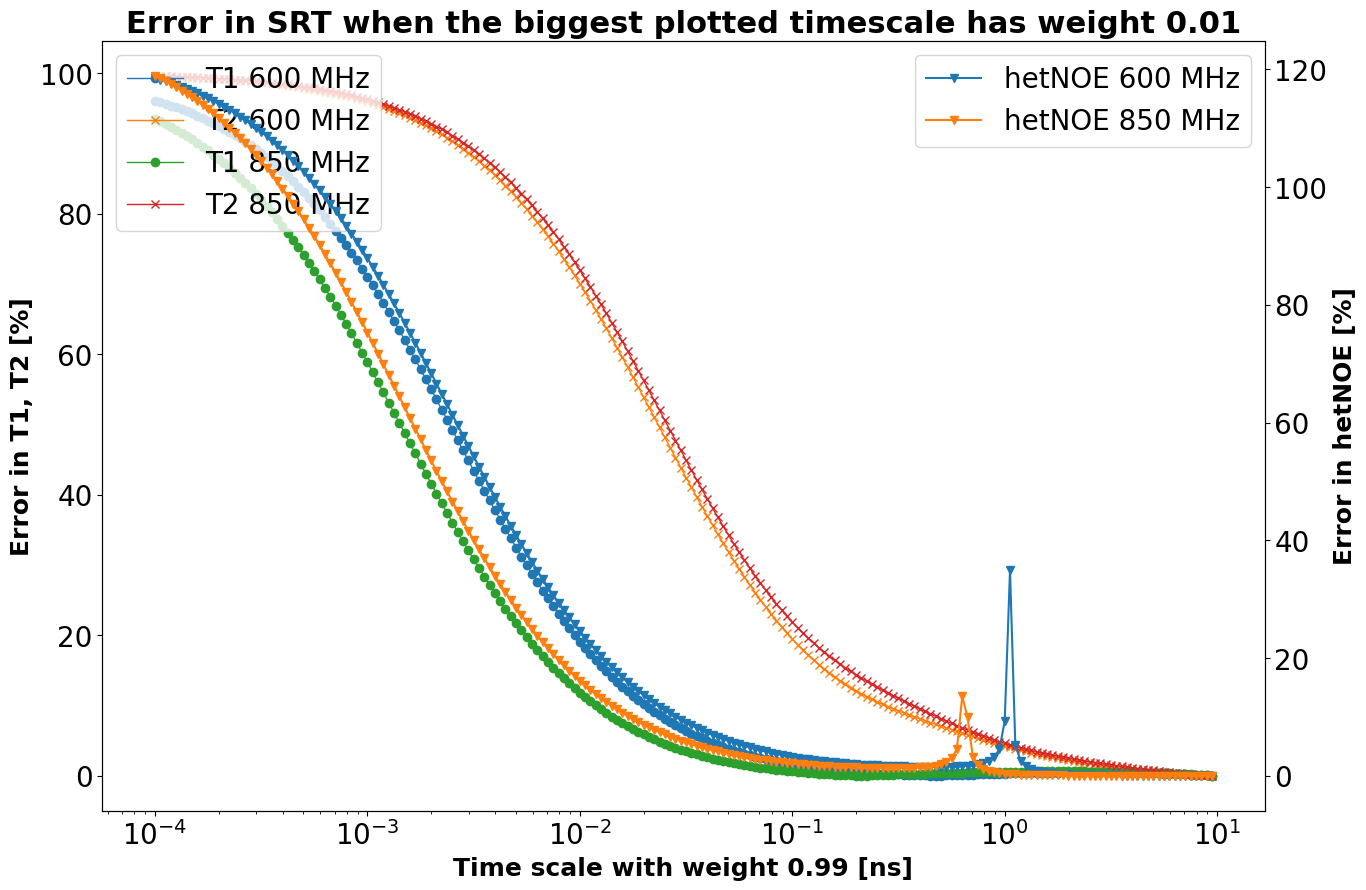

In [72]:
#plot relaxation times as a function of dynamics and magnetic field, only 2D plot, atm
magnetic_fields=[600,850]

last_weight=0.01
smallest_corr_time=-1 # enter in log scale -3 fs; 0 ps; 3 ns; 6 us;
biggest_corr_time=4 # same as above
N_exp_to_fit=200 # number of exponential functions to be fitted between the samlles and biggest corr time

step_exp=(biggest_corr_time-smallest_corr_time)/N_exp_to_fit
Ctimes = 10 ** np.arange(smallest_corr_time, biggest_corr_time, step_exp)
Ctimes = Ctimes * 0.001 * 10 ** (-9);

fig,ax = plt.subplots(figsize=(15, 10))
ax.set_xlabel("Time scale with weight "+str(1-last_weight)+" [ns]",fontsize=18, weight = 'bold')
ax.set_ylabel("Error in T1, T2 [%]",fontsize=18, weight = 'bold')
ax.set_xscale('log')
ax2=ax.twinx()
ax2.set_ylabel("Error in hetNOE [%]",fontsize=18, weight = 'bold')
ax2.set_xscale('log')



title=""
for magn_field in magnetic_fields:
    magnetic_field=magn_field*2*np.pi/gammaH*10**6
    
    T1=[]
    T2=[]
    NOE=[]
    
    T1_2=[]
    T2_2=[]
    NOE_2=[]
    
    T1_err=[]
    T2_err=[]
    NOE_err=[]
    for time_scale in Ctimes:
        t1, t2, noe = rt.get_relaxation_N(magnetic_field,[1],[time_scale],OP)
        t1_err, t2_err, noe_err = rt.get_relaxation_N(magnetic_field,[1-last_weight,last_weight],[time_scale,Ctimes[-1]],OP)
        T1.append(t1)
        T2.append(t2)
        NOE.append(noe)
        
        T1_2.append(t1_err)
        T2_2.append(t2_err)
        NOE_2.append(noe_err)
        
        
        T1_err.append(np.abs(t1-t1_err)/t1*100)
        T2_err.append(np.abs(t2-t2_err)/t2*100)
        NOE_err.append(np.abs(noe-noe_err)/np.abs(noe)*100)
    
    ax.plot(Ctimes*10**9,T1_err,label="T1 " + str(magn_field)+ " MHz",  marker="o", linewidth=1.0)
    ax.plot(Ctimes*10**9,T2_err,label="T2 " + str(magn_field)+ " MHz",   marker="x", linewidth=1.0)
    ax2.plot(Ctimes*10**9,NOE_err,label="hetNOE " + str(magn_field)+ " MHz",marker="v")
    
    #ax.plot(Ctimes*10**9,T1,label="T1 " + str(magn_field)+ " MHz",  marker="o", linewidth=1.0)
    #ax.plot(Ctimes*10**9,T2,label="T2 " + str(magn_field)+ " MHz",   marker="x", linewidth=1.0)
    #ax2.plot(Ctimes*10**9,NOE,label="hetNOE " + str(magn_field)+ " MHz",marker="v")
    
    #ax.plot(Ctimes*10**9,T1_2,label="T1 err " + str(magn_field)+ " MHz",  marker="s", linewidth=1.0)
    #ax.plot(Ctimes*10**9,T2_2,label="T2 " + str(magn_field)+ " MHz",   marker="x", linewidth=1.0)
    #ax2.plot(Ctimes*10**9,NOE_2,label="hetNOE " + str(magn_field)+ " MHz",marker="v")
    
    
    title+= str(magn_field) + ", "
    

ax.set_title("Error in SRT when the biggest plotted timescale has weight "+str(last_weight),fontsize=22, weight = 'bold')
ax2.legend(loc='upper right')

ax.legend(loc='upper left')

plt.savefig("errors_10ns.pdf")
plt.show()